# Determining expression of model genes
Author: Petra Schwale

In [ ]:
import besca as bc
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
from scipy import sparse, io
import os
import time
import logging
import seaborn as sns
sc.logging.print_versions()

# for standard processing, set verbosity to minimum
sc.settings.verbosity = 0  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80)
version = '2.8'
start0 = time.time()

In [2]:
#define standardized filepaths based on above input
root_path = os.getcwd()
bescapath_full = os.path.dirname(bc.__file__)
bescapath = os.path.split(bescapath_full)[0]

In [3]:
modelgenes=pd.read_csv(os.path.split(root_path)[0]+'/data/features_final_85.tsv',sep='\t')

In [5]:
#summarygenes=pd.read_csv(os.path.split(root_path)[0]+'/data/features_summary.tsv',sep='\t')

In [6]:
modelgenes=modelgenes.loc[modelgenes['prop']>=0.85,:]

In [7]:
modelgenes

,class,feature,n,median_coef,prop
0,desert,CD8A,1000.0,-0.487754,1.000
1,desert,CXCL9,1000.0,-0.173734,1.000
2,desert,NKD1,1000.0,0.079516,1.000
3,excluded,PGBD4,1000.0,-0.170783,1.000
4,excluded,SLC45A4,1000.0,-0.114907,1.000
5,inflamed,ITGAE,1000.0,0.689510,1.000
6,inflamed,MOV10,1000.0,0.216423,1.000
7,desert,ARRDC4,998.0,0.096248,0.998
8,inflamed,PSMB9,997.0,0.184268,0.997
9,excluded,GBE1,994.0,-0.082515,0.994


In [8]:
modelgenes.loc[modelgenes.median_coef<0,'median_coef']='blue'
modelgenes.loc[modelgenes.median_coef!='blue','median_coef']='red'


In [9]:
modelgenes

,class,feature,n,median_coef,prop
0,desert,CD8A,1000.0,blue,1.000
1,desert,CXCL9,1000.0,blue,1.000
2,desert,NKD1,1000.0,red,1.000
3,excluded,PGBD4,1000.0,blue,1.000
4,excluded,SLC45A4,1000.0,blue,1.000
5,inflamed,ITGAE,1000.0,red,1.000
6,inflamed,MOV10,1000.0,red,1.000
7,desert,ARRDC4,998.0,red,0.998
8,inflamed,PSMB9,997.0,red,0.997
9,excluded,GBE1,994.0,blue,0.994


In [10]:
kimmuno=['IDO1', 'CXCL9','LAG3','CD8A', 'MYO7A', 'TFAP2A','MOV10','S100A13']
kexcluded=['LAMP5', 'FANK1','MMRN1']
kdesert=['SLC2A10','SLC45A4','NKD1']

In [11]:
coefinf=modelgenes.loc[modelgenes['class']=='inflamed',:].median_coef
coefinf.index=modelgenes.loc[modelgenes['class']=='inflamed',:]['feature']
coefex=modelgenes.loc[modelgenes['class']=='excluded',:].median_coef
coefex.index=modelgenes.loc[modelgenes['class']=='excluded',:]['feature']
coefdes=modelgenes.loc[modelgenes['class']=='desert',:].median_coef
coefdes.index=modelgenes.loc[modelgenes['class']=='desert',:]['feature']

In [12]:
inflamed=modelgenes.loc[modelgenes['class']=='inflamed',:].copy()
excluded=modelgenes.loc[modelgenes['class']=='excluded',:].copy()
desert=modelgenes.loc[modelgenes['class']=='desert',:].copy()

In [13]:
inflamed=list(set(inflamed['feature'])-set(['(Intercept)']))
excluded=list(set(excluded['feature'])-set(['(Intercept)']))
desert=list(set(desert['feature'])-set(['(Intercept)']))

In [14]:
analysis_name = 'modelgenes'
results_folder = os.path.join(root_path, '..', 'data')
figdir=os.path.join(root_path, 'analyzed', analysis_name+'/figures/')
sc.settings.figdir = figdir
clusters='leiden'

In [ ]:
lee = bc.datasets.Lee2020_processed() #alternative:
lee


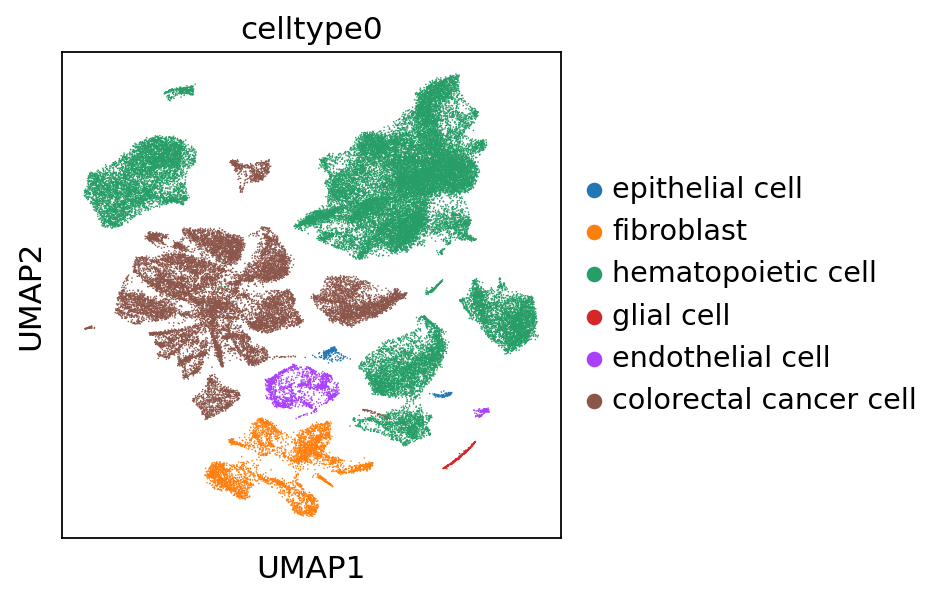

In [16]:
sc.pl.umap(lee,color='celltype0')

In [17]:
lee.obs['plotcelltype']=lee.obs['celltype3'].copy()

In [18]:
lee.obs['plotcelltype']=lee.obs['plotcelltype'].replace('cytotoxic CD56-dim natural killer cell','natural killer cell')
lee.obs['plotcelltype']=lee.obs['plotcelltype'].replace('CD8-positive, alpha-beta cytotoxic T cell','CD8-positive T cell')
lee.obs['plotcelltype']=lee.obs['plotcelltype'].replace('IgA plasma cell','plasma cell')
lee.obs['plotcelltype']=lee.obs['plotcelltype'].replace('IgG plasma cell','plasma cell')
lee.obs['plotcelltype']=lee.obs['plotcelltype'].replace('CD1c-positive myeloid dendritic cell','myeloid dendritic cell')
lee.obs['plotcelltype']=lee.obs['plotcelltype'].replace('memory B cell','B cell')
lee.obs['plotcelltype']=lee.obs['plotcelltype'].replace('naive B cell','B cell')
lee.obs['plotcelltype']=lee.obs['plotcelltype'].replace('classical monocyte','monocyte')
lee.obs['plotcelltype']=lee.obs['plotcelltype'].replace('MARCO-positive macrophage','macrophage')
lee.obs['plotcelltype']=lee.obs['plotcelltype'].replace('central memory CD4-positive, alpha-beta T cell','CD4-positive T cell')
lee.obs['plotcelltype']=lee.obs['plotcelltype'].replace('effector memory CD8-positive, alpha-beta T cell','CD8-positive T cell')
lee.obs['plotcelltype']=lee.obs['plotcelltype'].replace('exhausted-like CD8-positive, alpha-beta T cell','CD8-positive T cell')
lee.obs['plotcelltype']=lee.obs['plotcelltype'].replace('naive thymus-derived CD4-positive, alpha-beta T cell','CD4-positive T cell')
lee.obs['plotcelltype']=lee.obs['plotcelltype'].replace('proliferating CD8-positive, alpha-beta T cell','proliferating T cell')


In [19]:
sc.tl.dendrogram(lee, groupby='plotcelltype')

In [ ]:
main=['NKD1','MMRN1','FANK1','LAMP5','IDO1', 'CXCL9', 'LAG3', 'CD8A', 'ITGAE', 'UBE2L6', 'PSMB8', 'PSMB9']
sc.pl.dotplot(lee,var_names=main, dendrogram=True, groupby='plotcelltype', dot_max=0.3,vmax=0.4, save='Lee-mainfig.svg')

In [21]:
list(set(modelgenes['feature'])-set(main))

['HIRA',
 'PGBD4',
 'MYO7A',
 'ARRDC4',
 'MOV10',
 'SLC45A4',
 'TFAP2A',
 'GBE1',
 'SLC2A10',
 'S100A13',
 'ADSL']

In [ ]:
others=list(set(modelgenes['feature'])-set(main))
others=[ 'PGBD4','MYO7A','TFAP2A','SLC2A10','GBE1',
 'MOV10',
 'SLC45A4','HIRA',
'ARRDC4',
 'S100A13',
 'ADSL']
sc.pl.dotplot(lee,var_names=others, dendrogram=True, groupby='plotcelltype', dot_max=0.2,vmax=0.3, save='Lee-supfig.svg')

In [ ]:
sc.pl.dotplot(lee,var_names=kimmuno, groupby='plotcelltype', dot_max=0.2,vmax=0.25, save='Lee-immunexpressed.svg')

In [ ]:
sc.pl.dotplot(lee,var_names=kexcluded, groupby='plotcelltype', dot_max=0.2,vmax=0.25, save='Lee-excludedhigh.svg')

In [ ]:
sc.pl.dotplot(lee,var_names=kdesert, groupby='plotcelltype', dot_max=0.2,vmax=0.25, save='Lee-deserthigh.svg')

In [23]:
[avg, fct]=bc.get_means(lee, 'dblabel')

In [24]:
[avg1, fct1]=bc.get_means(lee, 'Cell_type')

In [25]:
[avg2, fct2]=bc.get_means(lee, 'Cell_subtype')

In [26]:
[avg3, fct3]=bc.get_means(lee, 'celltype2')

In [27]:
set(avg3.index)

{'B cell',
 'CD4-positive, alpha-beta T cell',
 'CD8-positive, alpha-beta T cell',
 'HEV endothelial cell',
 'blood vessel endothelial cell',
 'classical monocyte',
 'colorectal cancer cell',
 'cytotoxic CD56-dim natural killer cell',
 'enterocyte',
 'fibroblast',
 'glial cell',
 'macrophage',
 'mast cell',
 'myeloid dendritic cell',
 'pericyte cell',
 'plasma cell',
 'plasmacytoid dendritic cell'}

In [28]:
coi=['B cell',
 'CD4-positive, alpha-beta T cell',
 'CD8-positive, alpha-beta T cell',
 'HEV endothelial cell',
 'blood vessel endothelial cell',
 'classical monocyte',
 'colorectal cancer cell',
 'cytotoxic CD56-dim natural killer cell',
 'enterocyte',
 'fibroblast',
 'glial cell',
 'macrophage',
 'myeloid dendritic cell',
 'pericyte cell',
 'plasmacytoid dendritic cell']

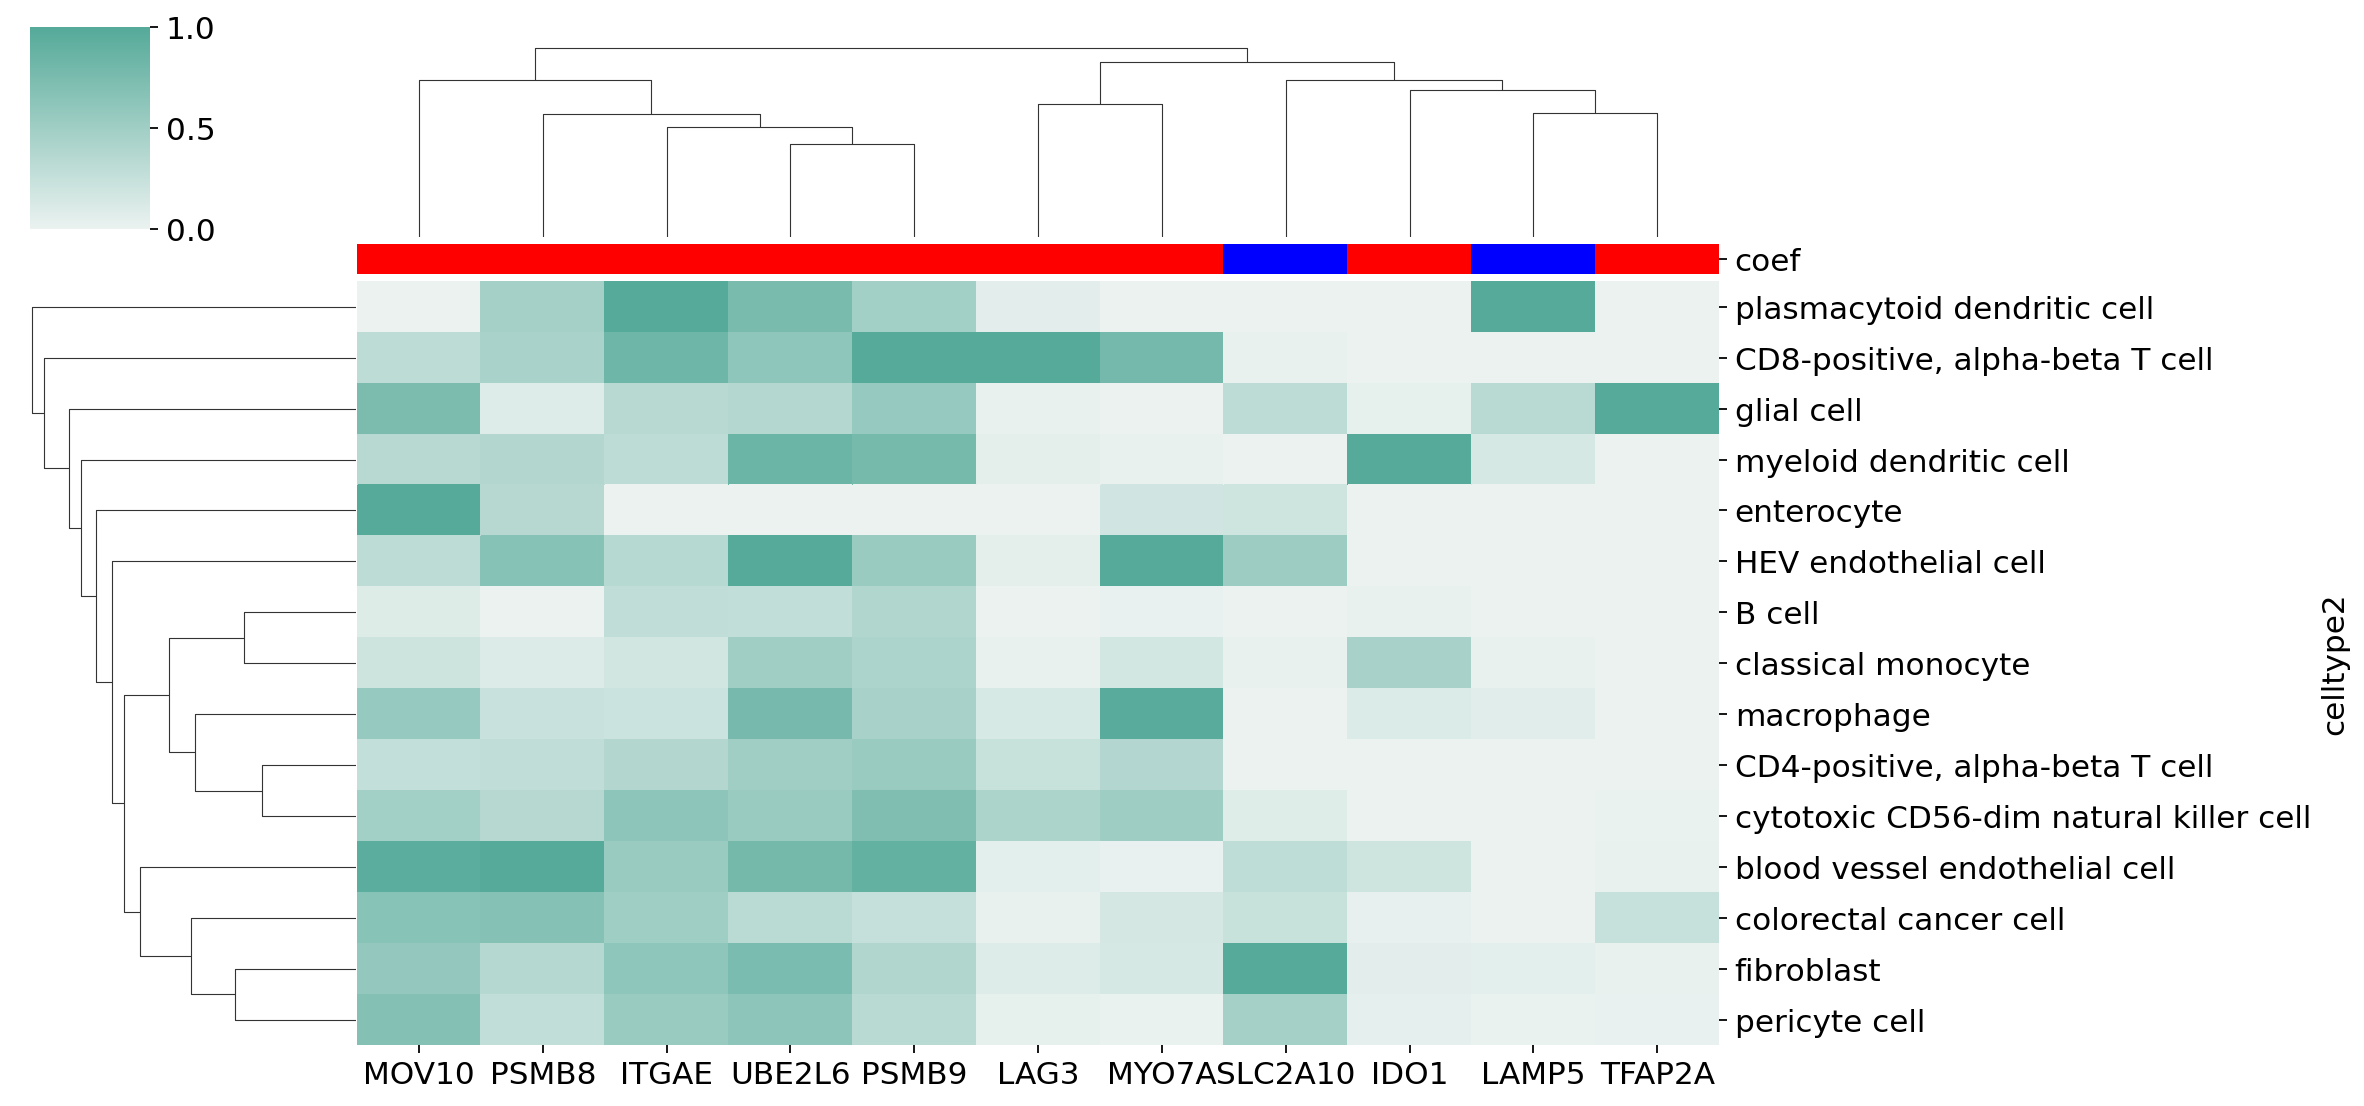

In [29]:
sns.clustermap(avg3.loc[coi,inflamed], standard_scale=1,
               figsize=(15, 7),cmap=sns.color_palette("light:#5A9", as_cmap=True),
              col_colors=coefinf[inflamed])

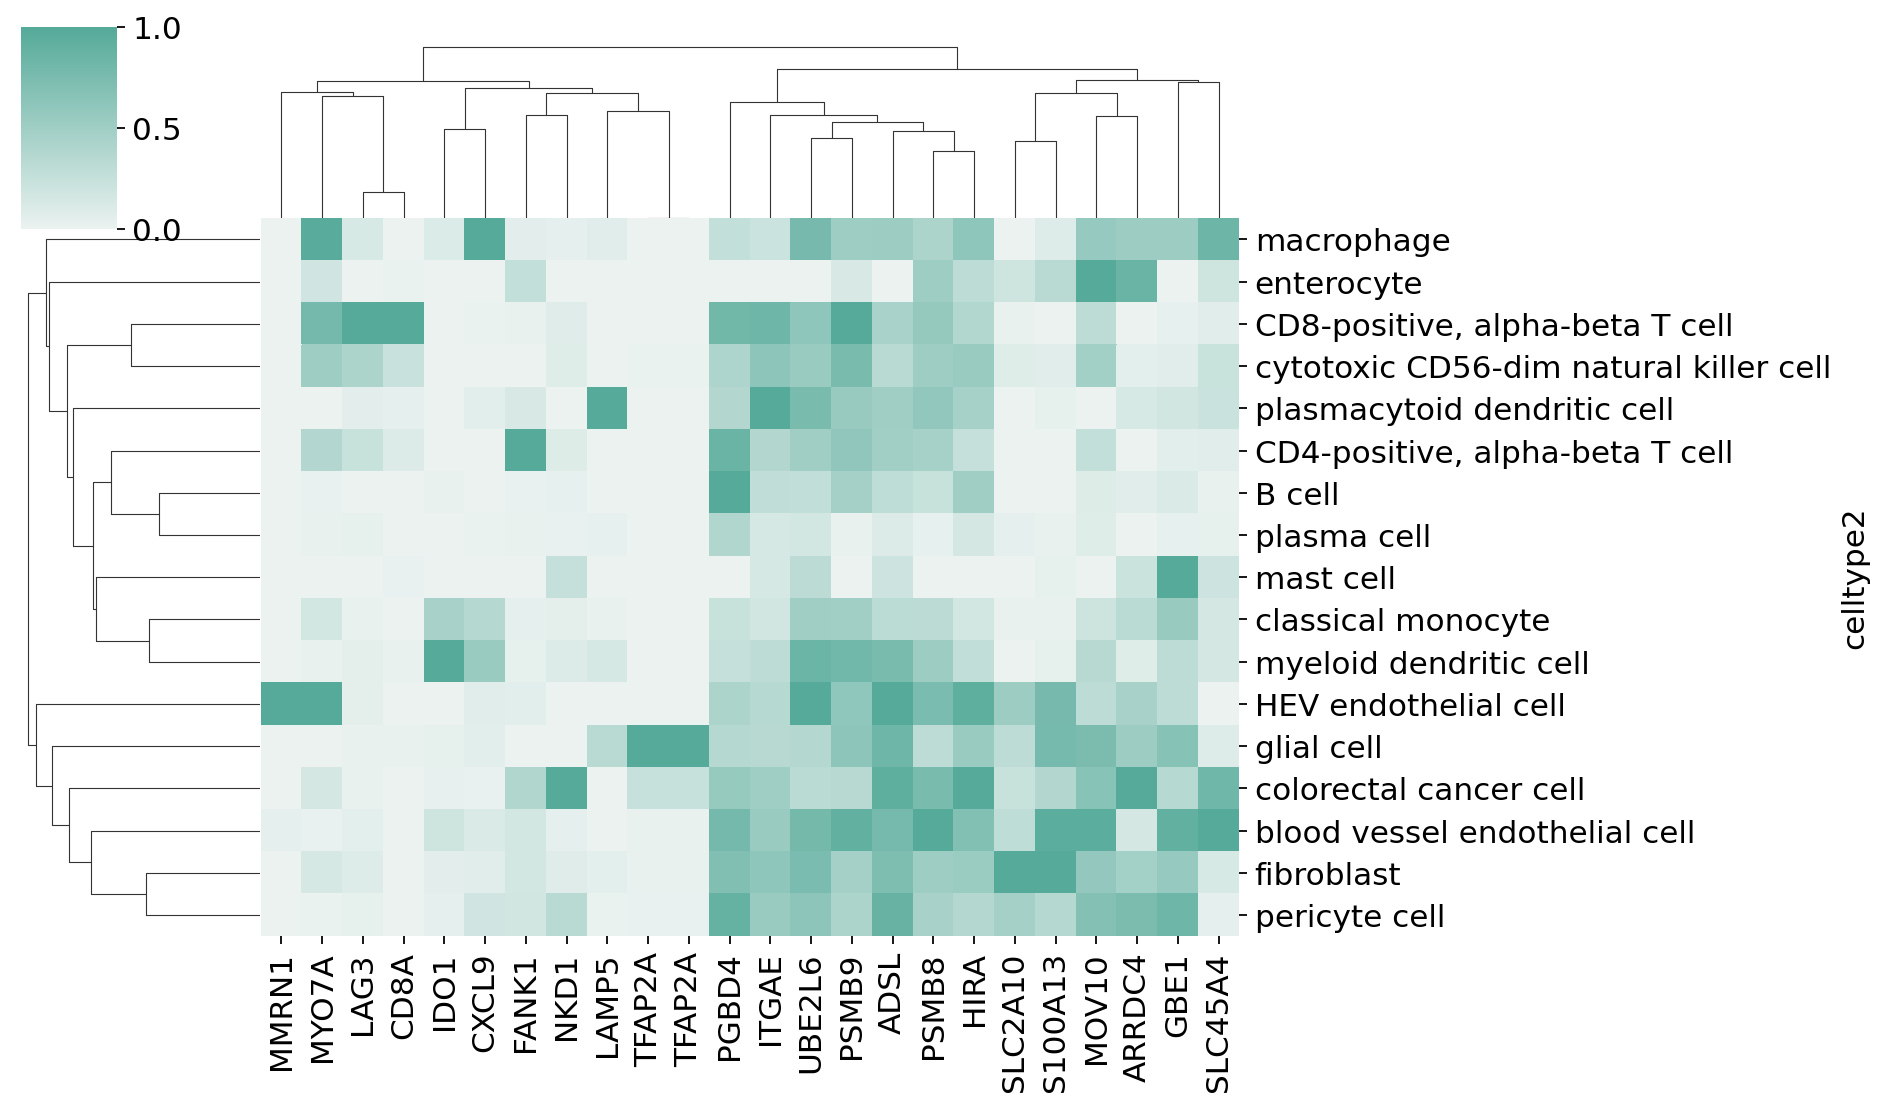

In [30]:
sns.clustermap(avg3.loc[:,inflamed+excluded+desert], standard_scale=1,
               figsize=(12, 7),cmap=sns.color_palette("light:#5A9", as_cmap=True))

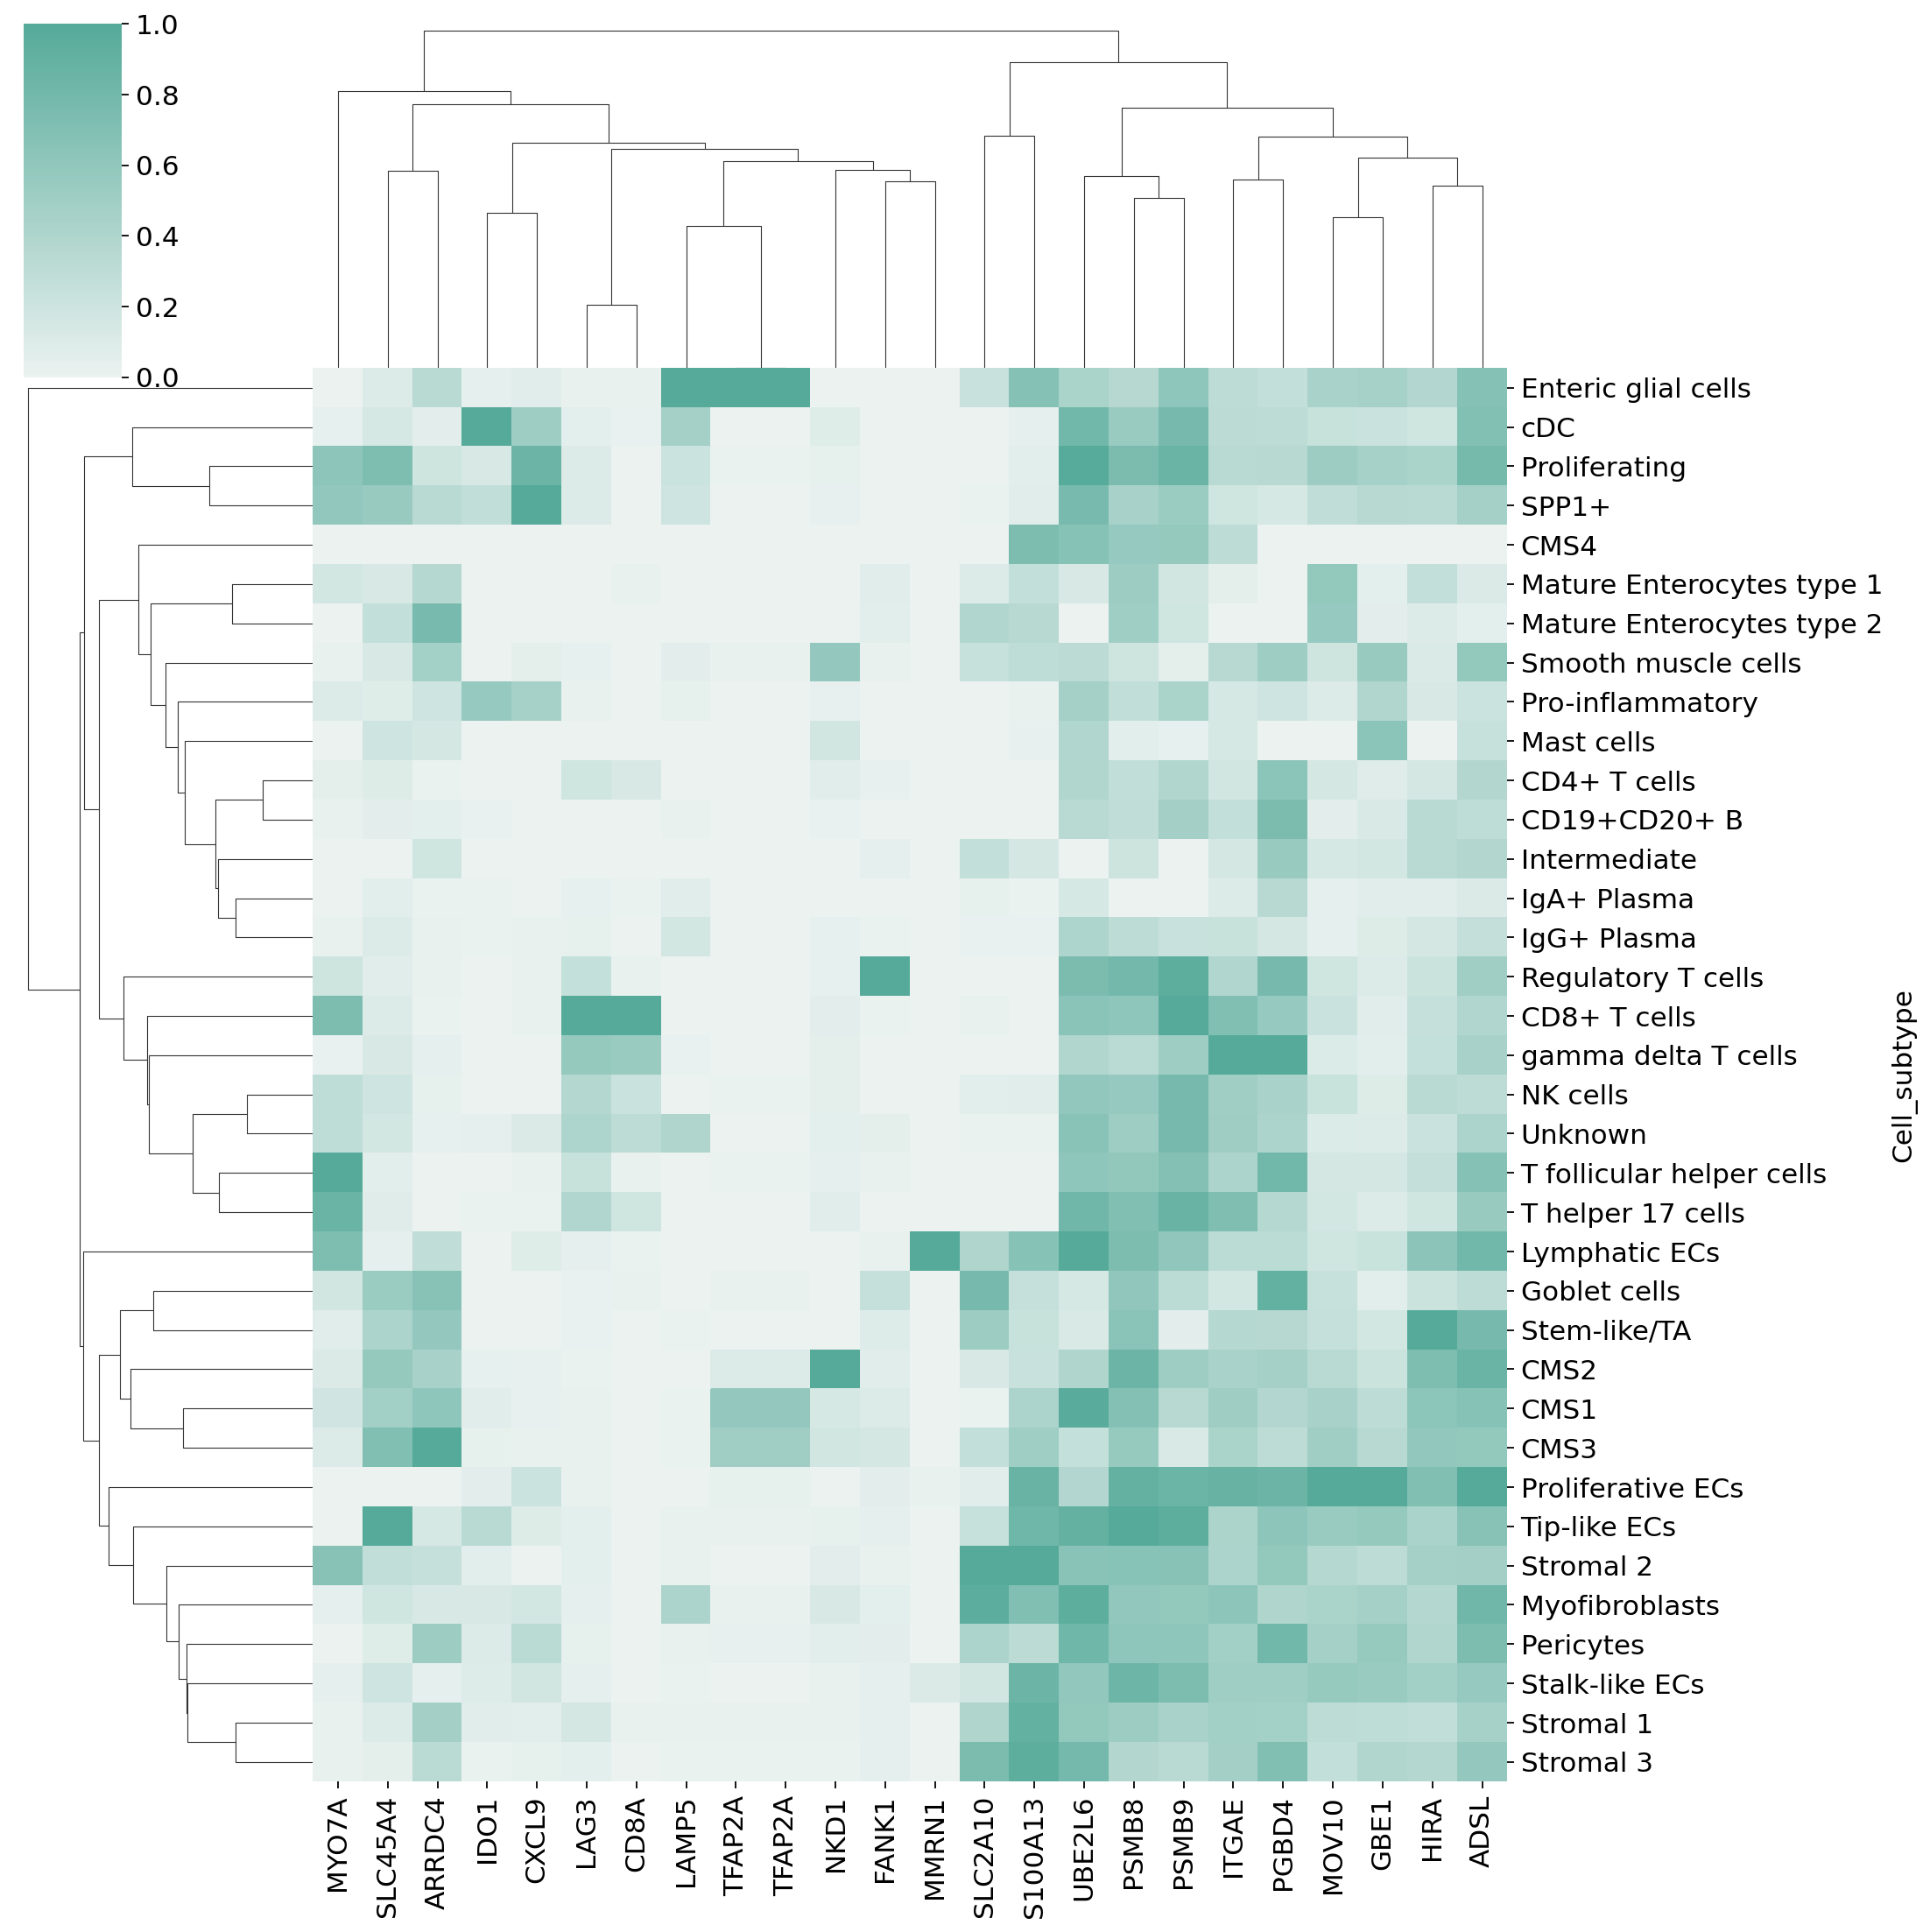

In [31]:
sns.clustermap(avg2.loc[:,inflamed+excluded+desert], standard_scale=1,
               figsize=(14, 14),cmap=sns.color_palette("light:#5A9", as_cmap=True))

In [32]:
crc=['SMIM22','NDUFB9','C1orf116', 'IL20RA','KRT80']
immune=['LAMP5']
glial=['TFAP2A','LRRCC1']
endo=['CCL21','']
firbo=['SLC2A10','ST6GAL2','GGT5']
cd8=['LAG3','CACNAI1']
myelo=['IDO1','TBC1D7','CD274', 'STAT1','DCLR1B']

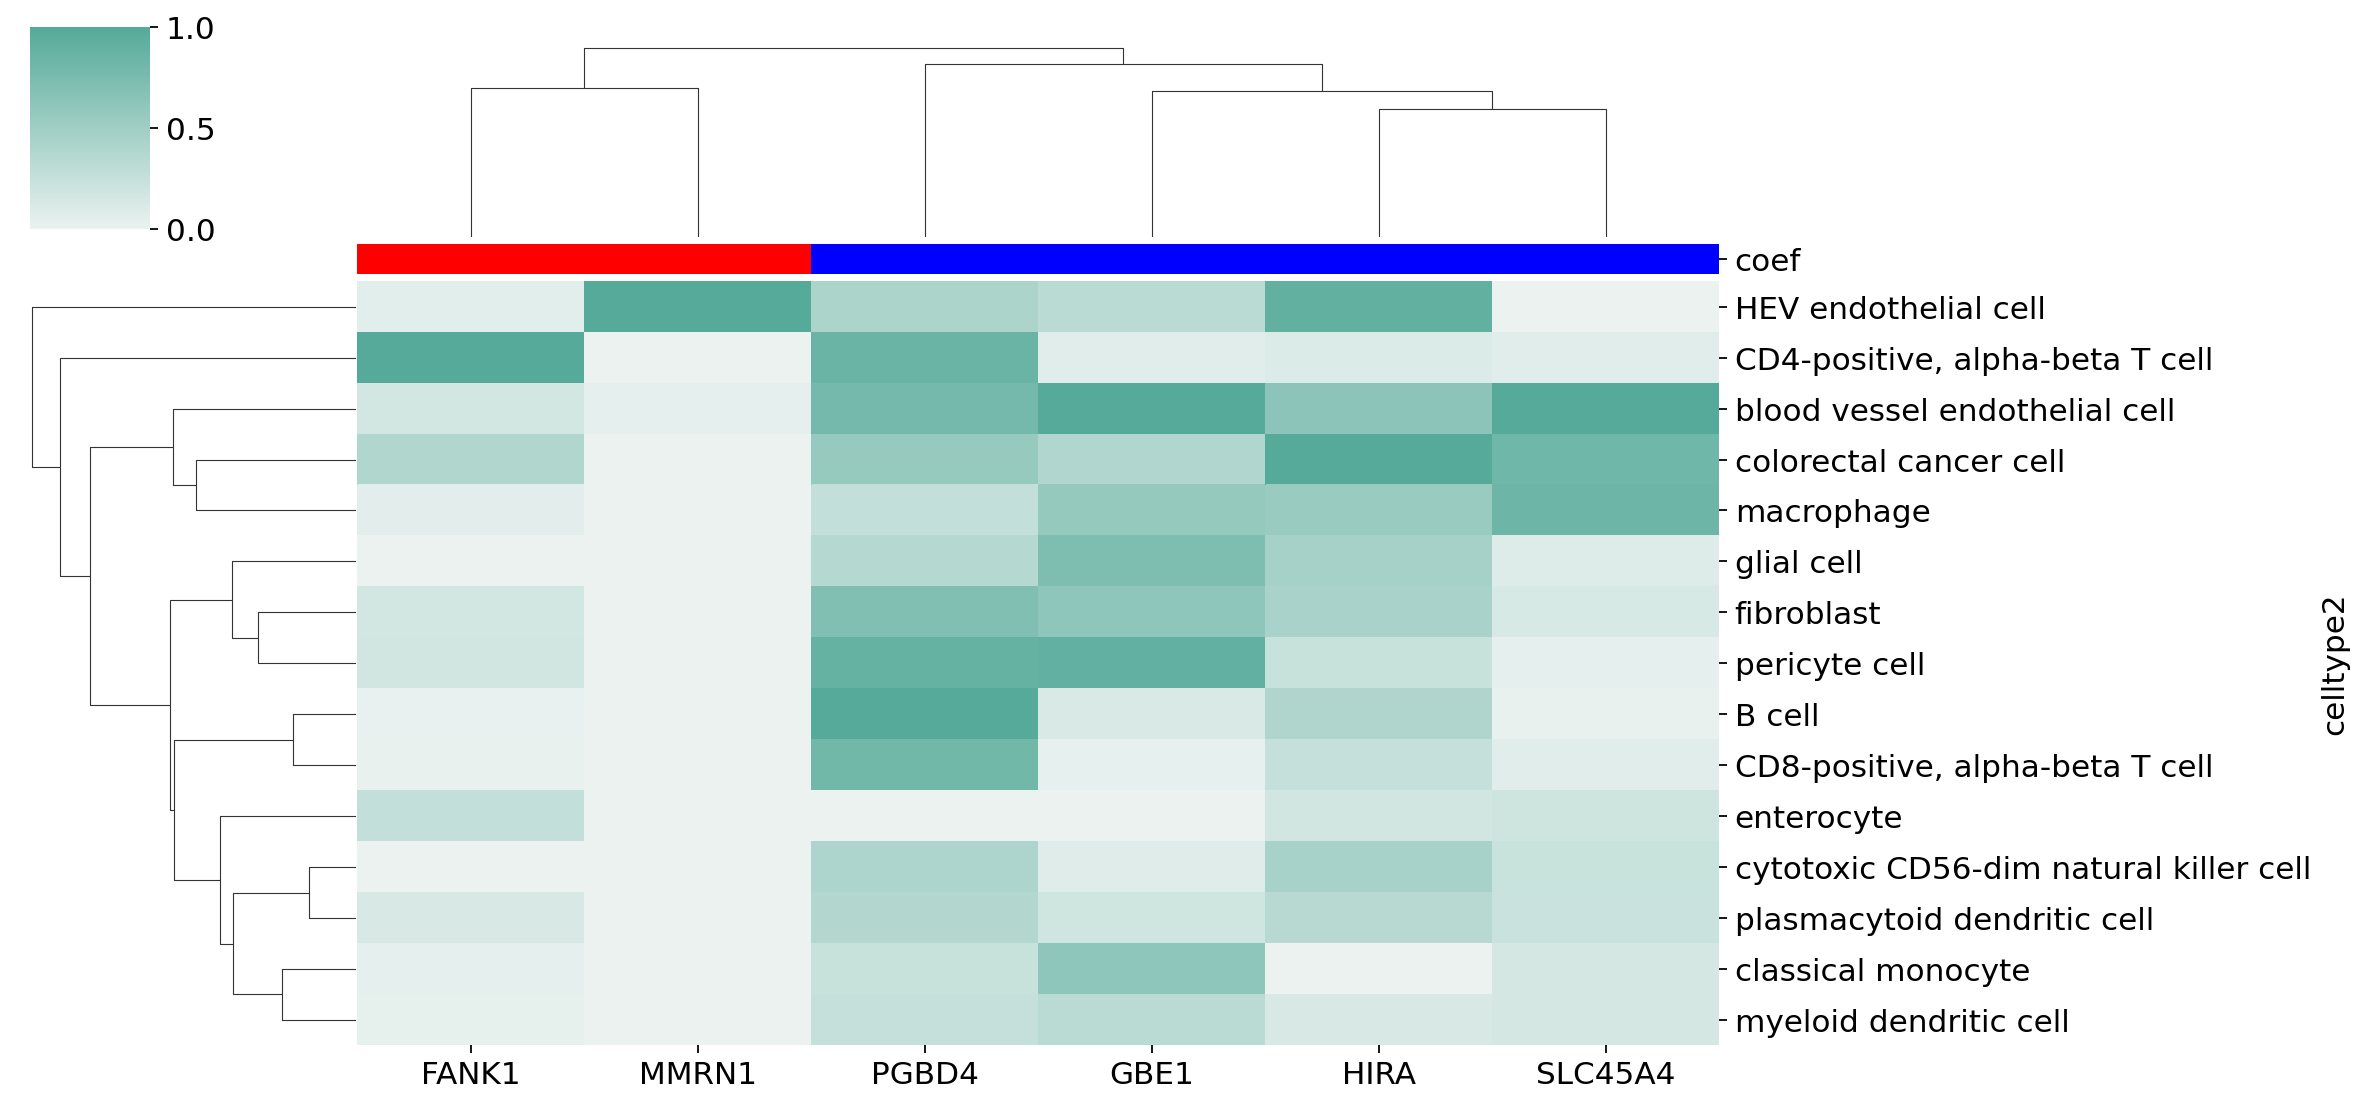

In [33]:
sns.clustermap(avg3.loc[coi,excluded], standard_scale=1,col_colors=coefex[excluded],
               figsize=(15, 7),cmap=sns.color_palette("light:#5A9", as_cmap=True))

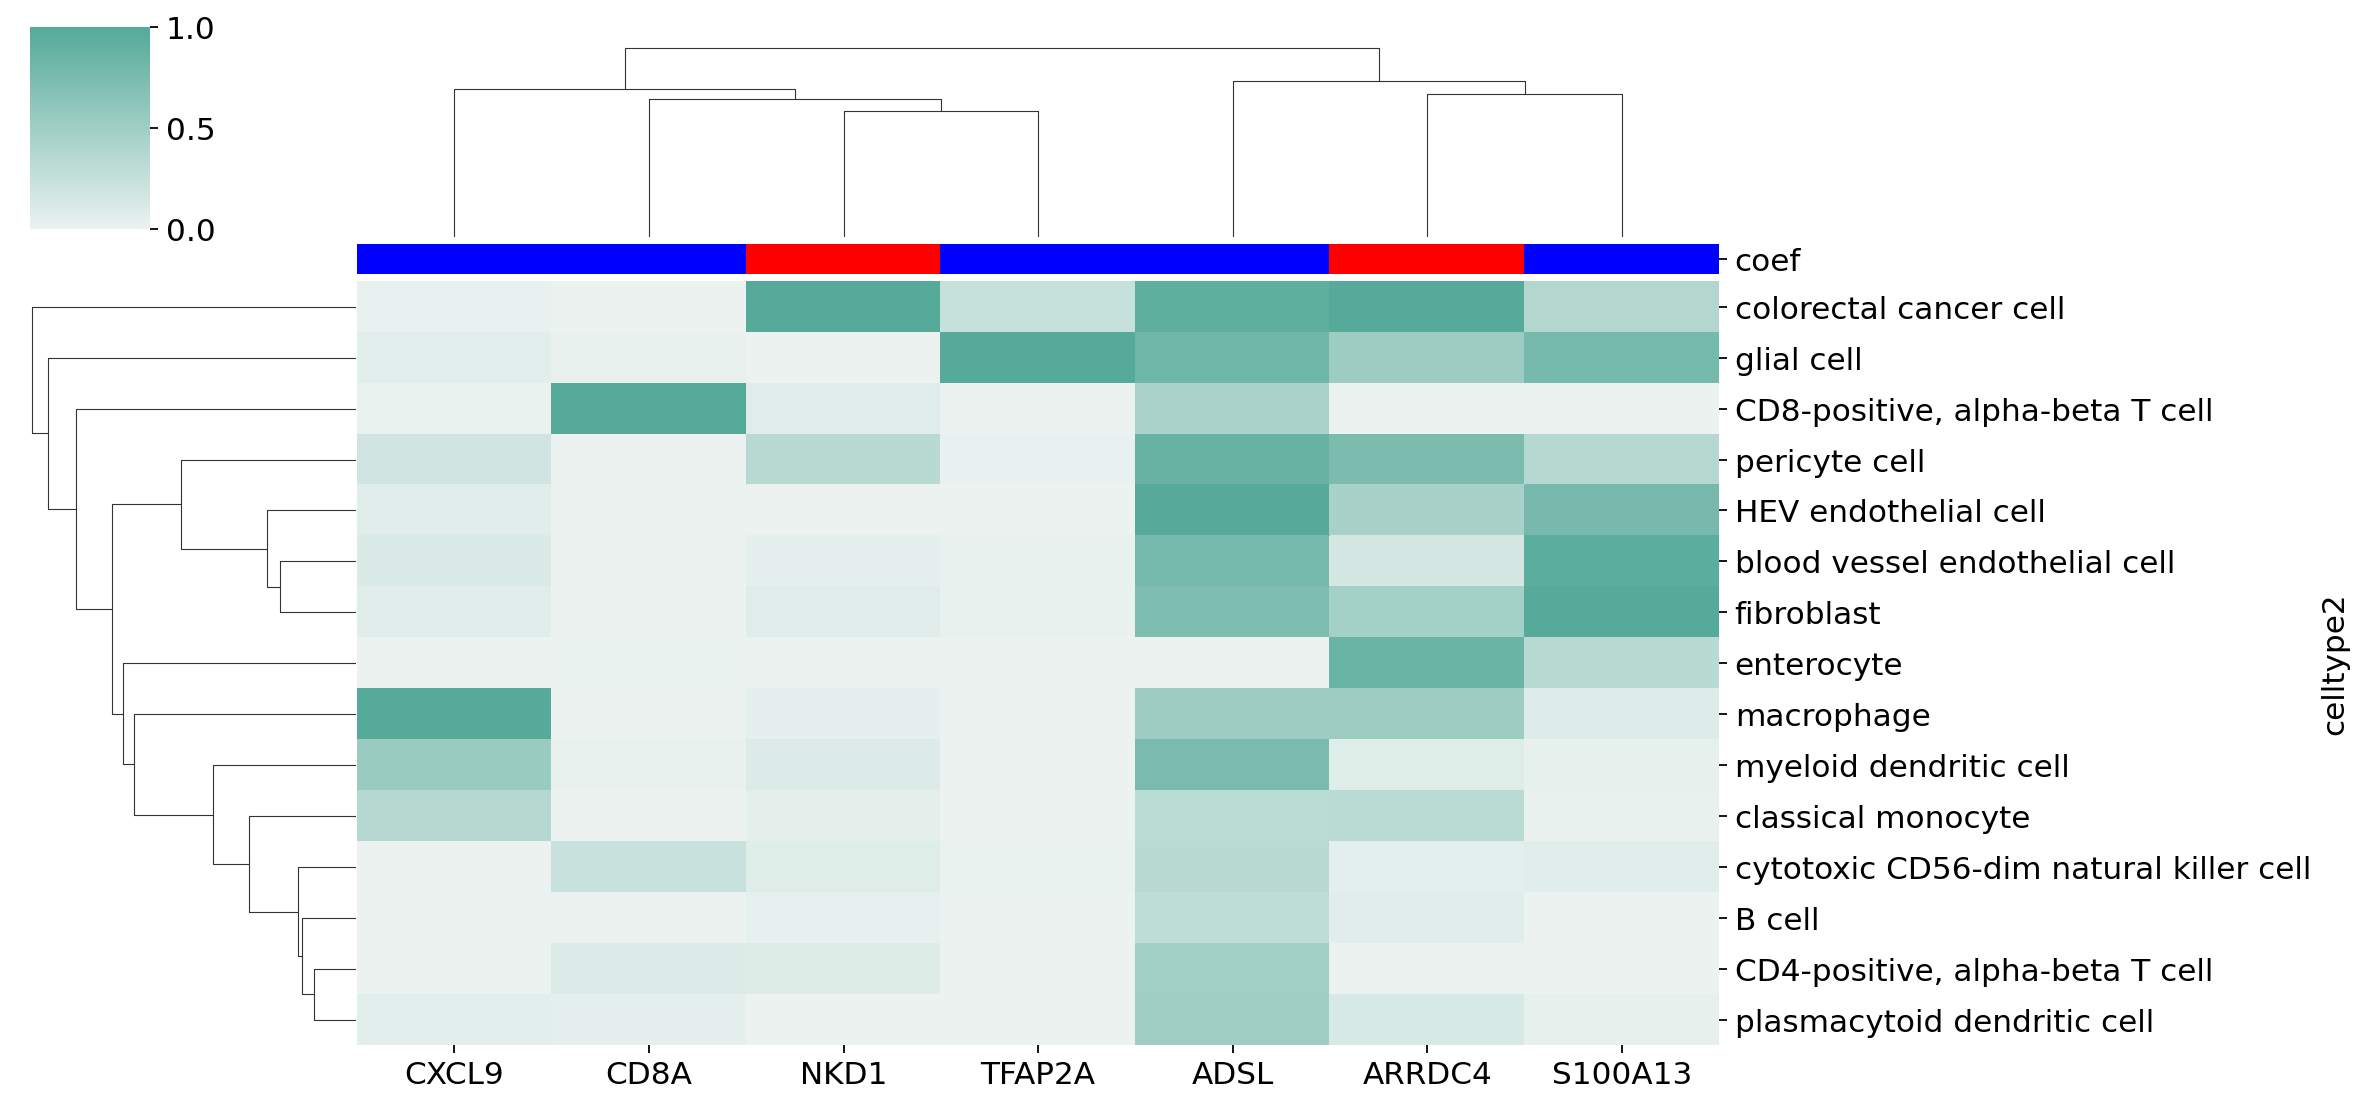

In [34]:
sns.clustermap(avg3.loc[coi,desert], standard_scale=1,col_colors=coefdes[desert],
               figsize=(15, 7),cmap=sns.color_palette("light:#5A9", as_cmap=True))

In [ ]:
peng = bc.datasets.Peng2019_processed() #alternative:
peng

In [ ]:
sc.pl.dotplot(peng[~peng.obs['celltype2'].isin(['plasma cell','pancreatic epsilon cell'])],var_names=kimmuno, groupby='celltype2', dot_max=0.2,vmax=0.25)

In [ ]:
sc.pl.dotplot(peng[~peng.obs['celltype2'].isin(['plasma cell','pancreatic epsilon cell'])],var_names=kexcluded, groupby='celltype3', dot_max=0.2,vmax=0.25)

In [ ]:
sc.pl.dotplot(peng[~peng.obs['celltype2'].isin(['plasma cell','pancreatic epsilon cell'])],var_names=kdesert, groupby='celltype2', dot_max=0.2,vmax=0.25)

In [ ]:
sc.pl.dotplot(peng[~peng.obs['celltype2'].isin(['plasma cell','pancreatic epsilon cell'])],var_names=main, groupby='celltype2', dot_max=0.2,vmax=0.25)

In [ ]:
sc.pl.dotplot(peng[~peng.obs['celltype2'].isin(['plasma cell','pancreatic epsilon cell'])],var_names=others, groupby='celltype2', dot_max=0.2,vmax=0.25)

In [40]:
[avgp, fctp]=bc.get_means(peng, 'celltype2')

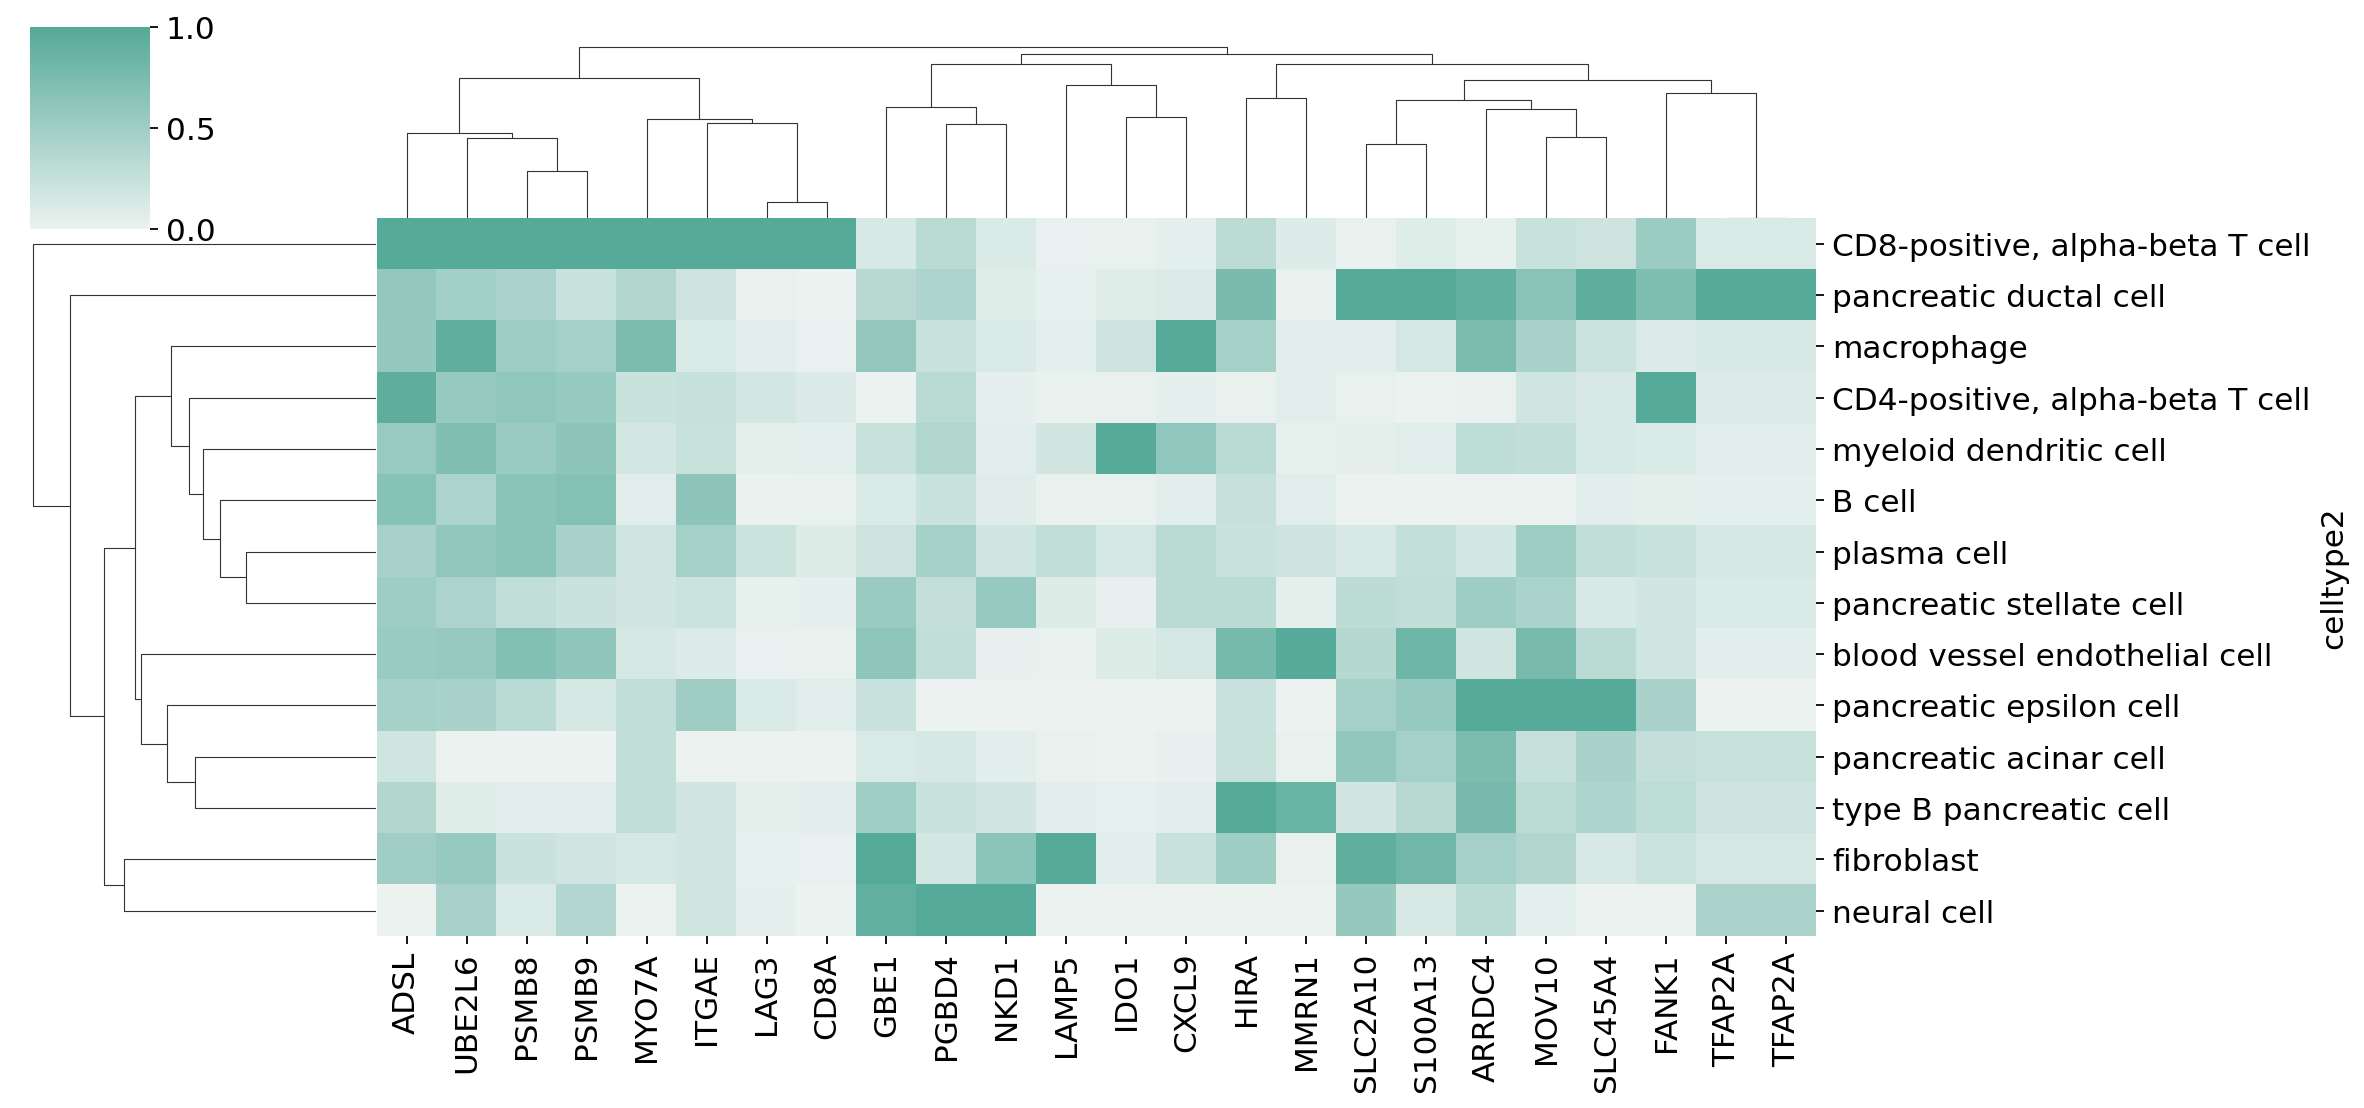

In [41]:
sns.clustermap(avgp.loc[:,inflamed+excluded+desert], standard_scale=1,
               figsize=(15, 7),cmap=sns.color_palette("light:#5A9", as_cmap=True))

In [42]:
cancer=['SMIM22','NDUFB9','C1orf116', 'IL20RA','KRT80', 'TFAP2A']
pDC=['LAMP5']
glial=['TFAP2A','LRRCC1']
endo=['CCL21','LRRCC1']
fibro=['SLC2A10','ST6GAL2','GGT5', 'LAMP5']
cd8=['LAG3', 'ITGAE']
cd4=['CACNAI1']
myelo=['IDO1','TBC1D7','CD274', 'STAT1','DCLR1B']
immune=['UBE2L6','PSMB8','PSMB9','']

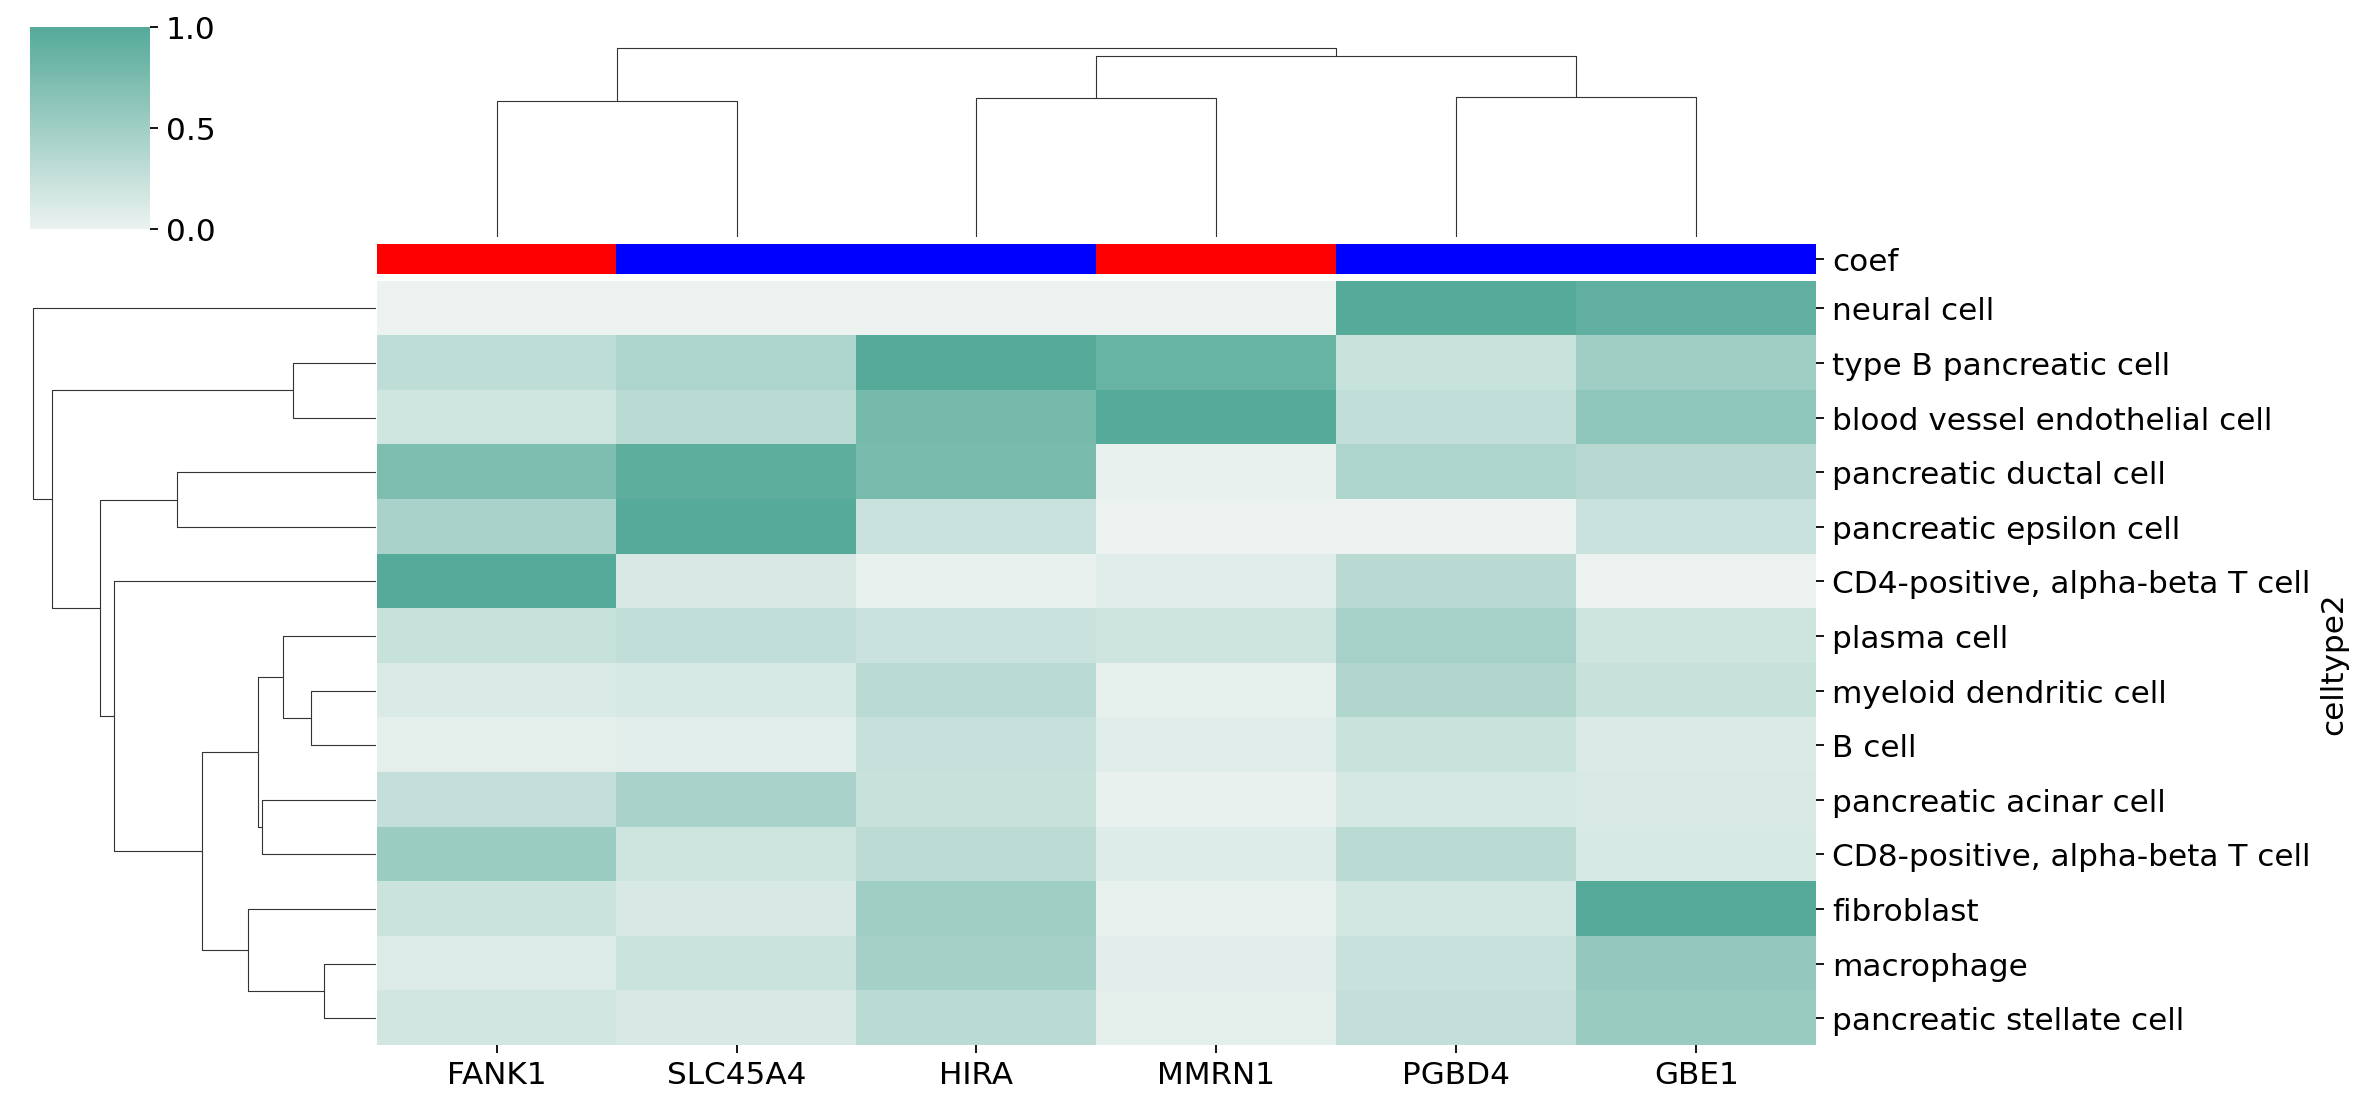

In [43]:
sns.clustermap(avgp.loc[:,excluded], standard_scale=1,
               figsize=(15, 7),cmap=sns.color_palette("light:#5A9", as_cmap=True),
              col_colors=coefex[excluded])

In [44]:
desertk=list(set(desert).intersection(set(peng.raw.var_names)))

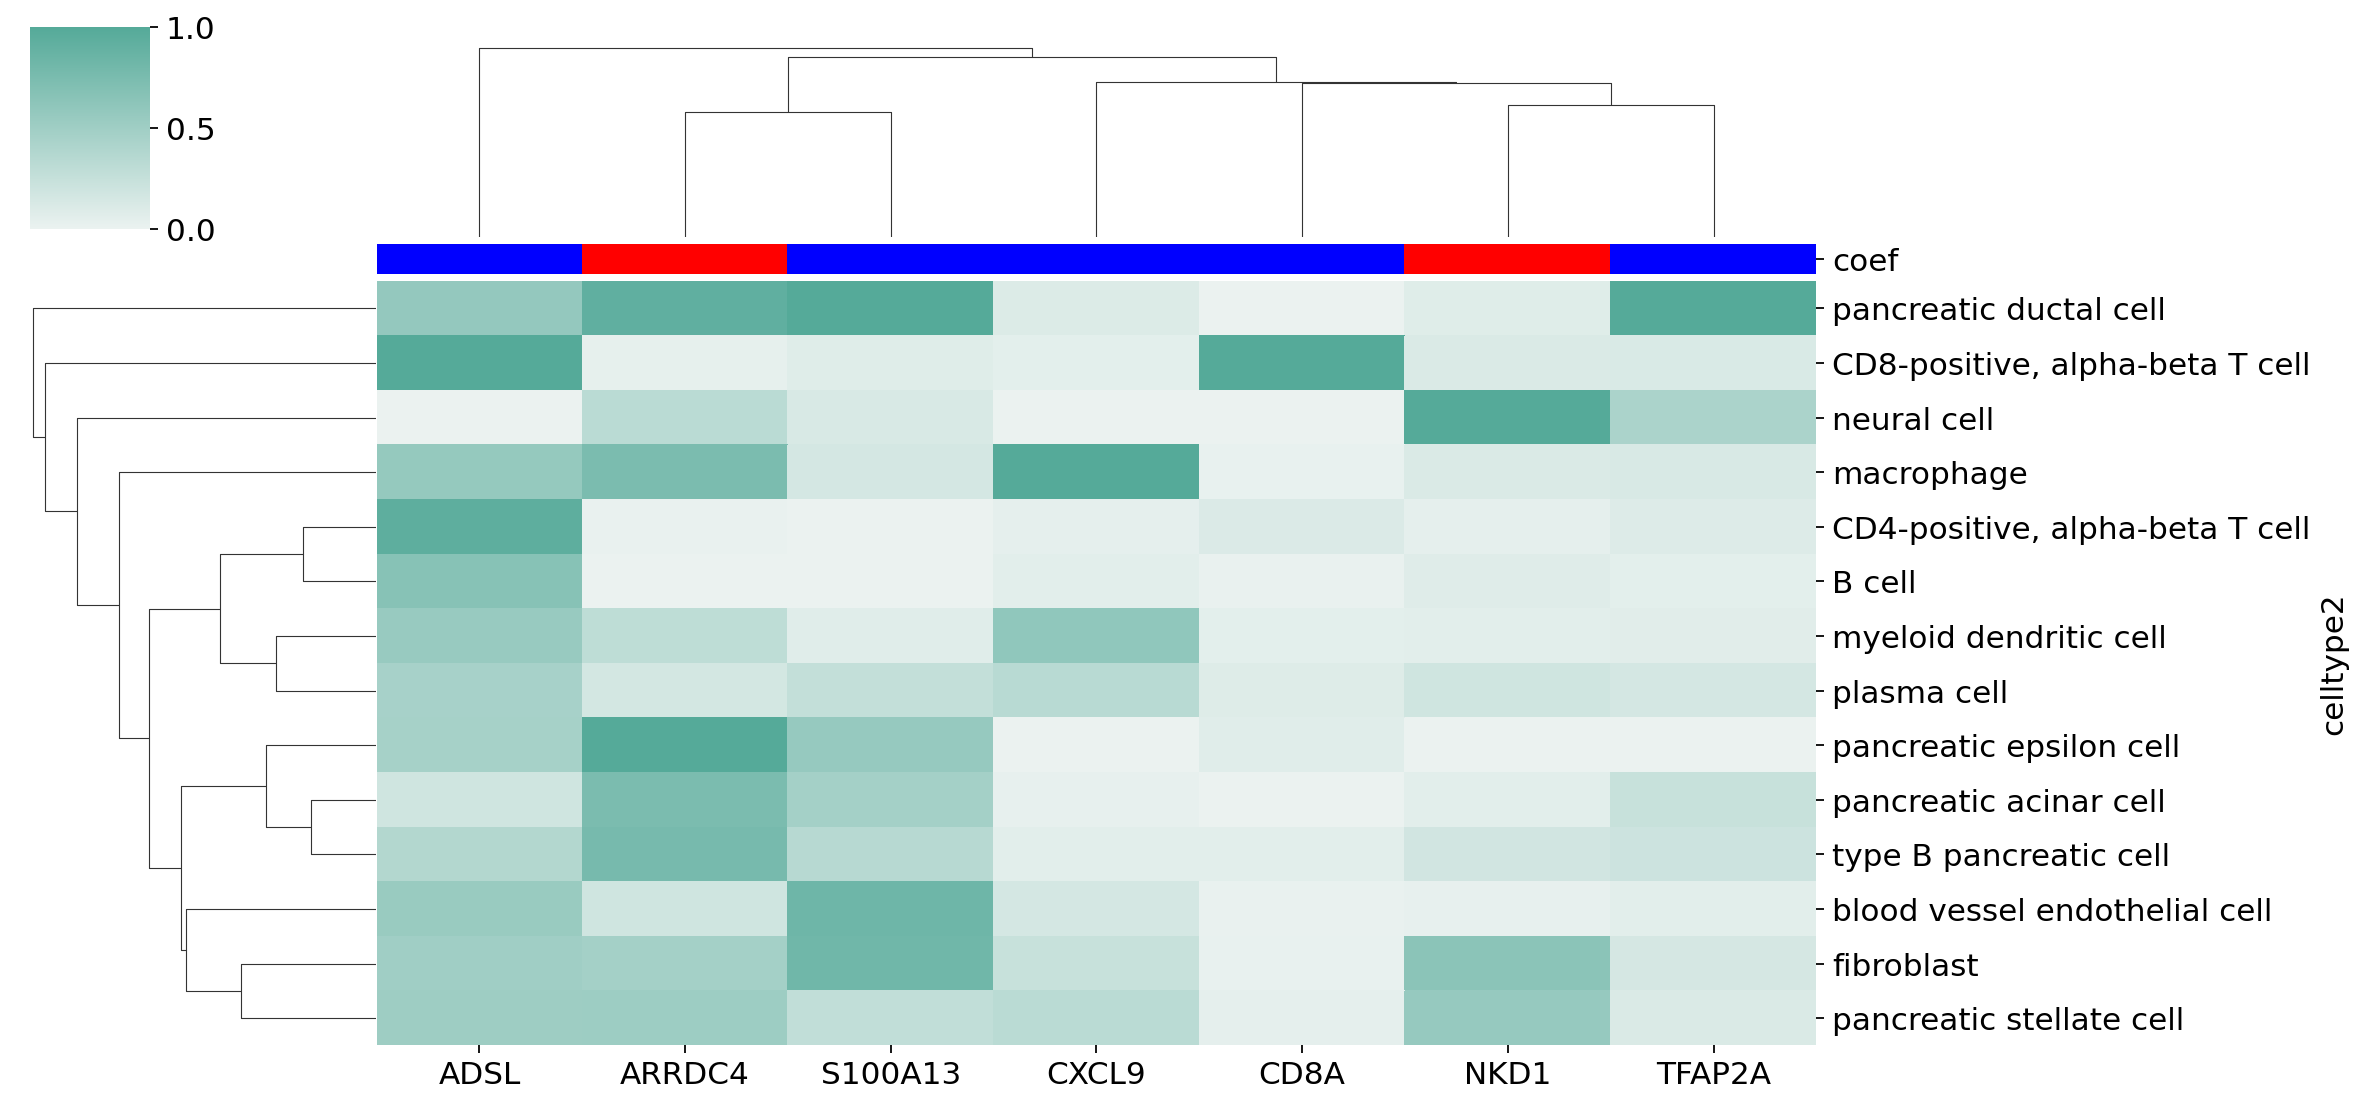

In [45]:
sns.clustermap(avgp.loc[:,desertk], standard_scale=1,col_colors=coefdes[desertk],
               figsize=(15, 7),cmap=sns.color_palette("light:#5A9", as_cmap=True))

### Liver cancer 

In [ ]:
livcanc=sc.read('standard_workflow_2_8_batch_PCS1.annotated.h5ad')

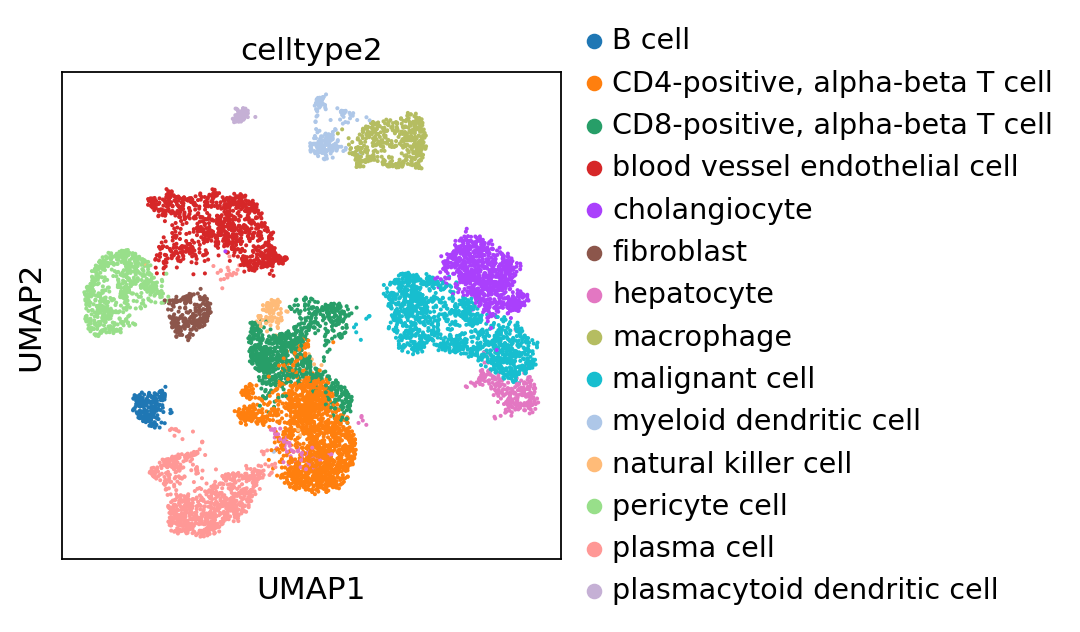

In [38]:
sc.pl.umap(livcanc,color='celltype2')

In [48]:
[avgp, fctp]=bc.get_means(livcanc, 'celltype2')

In [39]:
inflamedk=list(set(inflamed).intersection(set(livcanc.raw.var_names)))

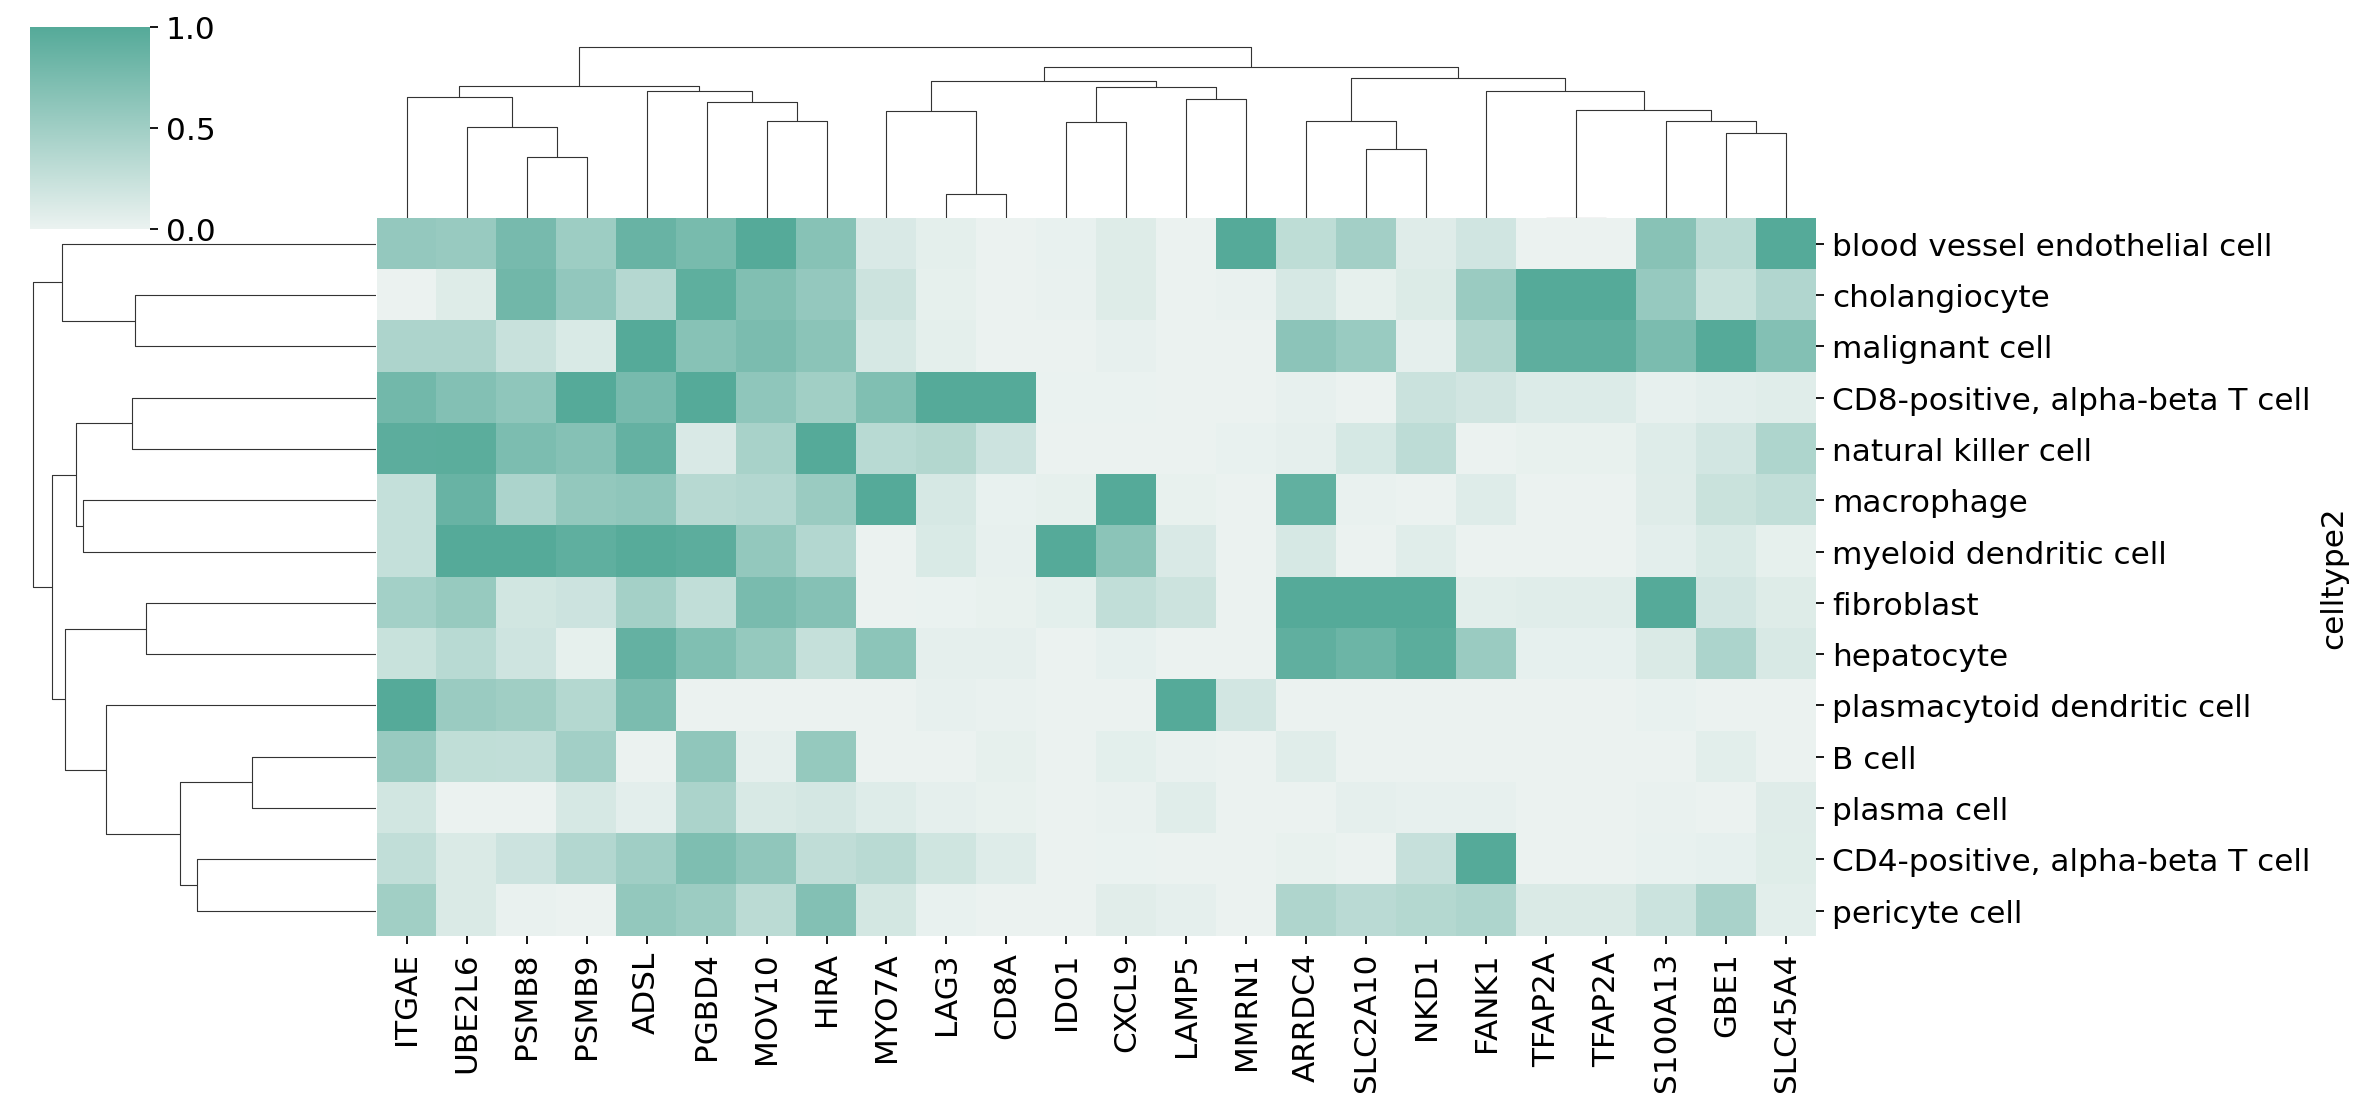

In [50]:
sns.clustermap(avgp.loc[:,inflamed+excluded+desert], standard_scale=1,
               figsize=(15, 7),cmap=sns.color_palette("light:#5A9", as_cmap=True))


In [40]:
cancer=['SMIM22','NDUFB9','C1orf116', 'IL20RA','KRT80', 'TFAP2A']
pDC=['LAMP5']
endo=['CCL21']
fibro=['SLC2A10','ST6GAL2','GGT5', 'LAMP5']
cd8=['LAG3', 'ITGAE']
cd4=['CACNAI1']
myelo=['IDO1','CD274', 'STAT1','MYO7A']
immune=['UBE2L6','PSMB8','PSMB9','DCLR1B']

In [41]:
excludedk=list(set(excluded).intersection(set(livcanc.raw.var_names)))

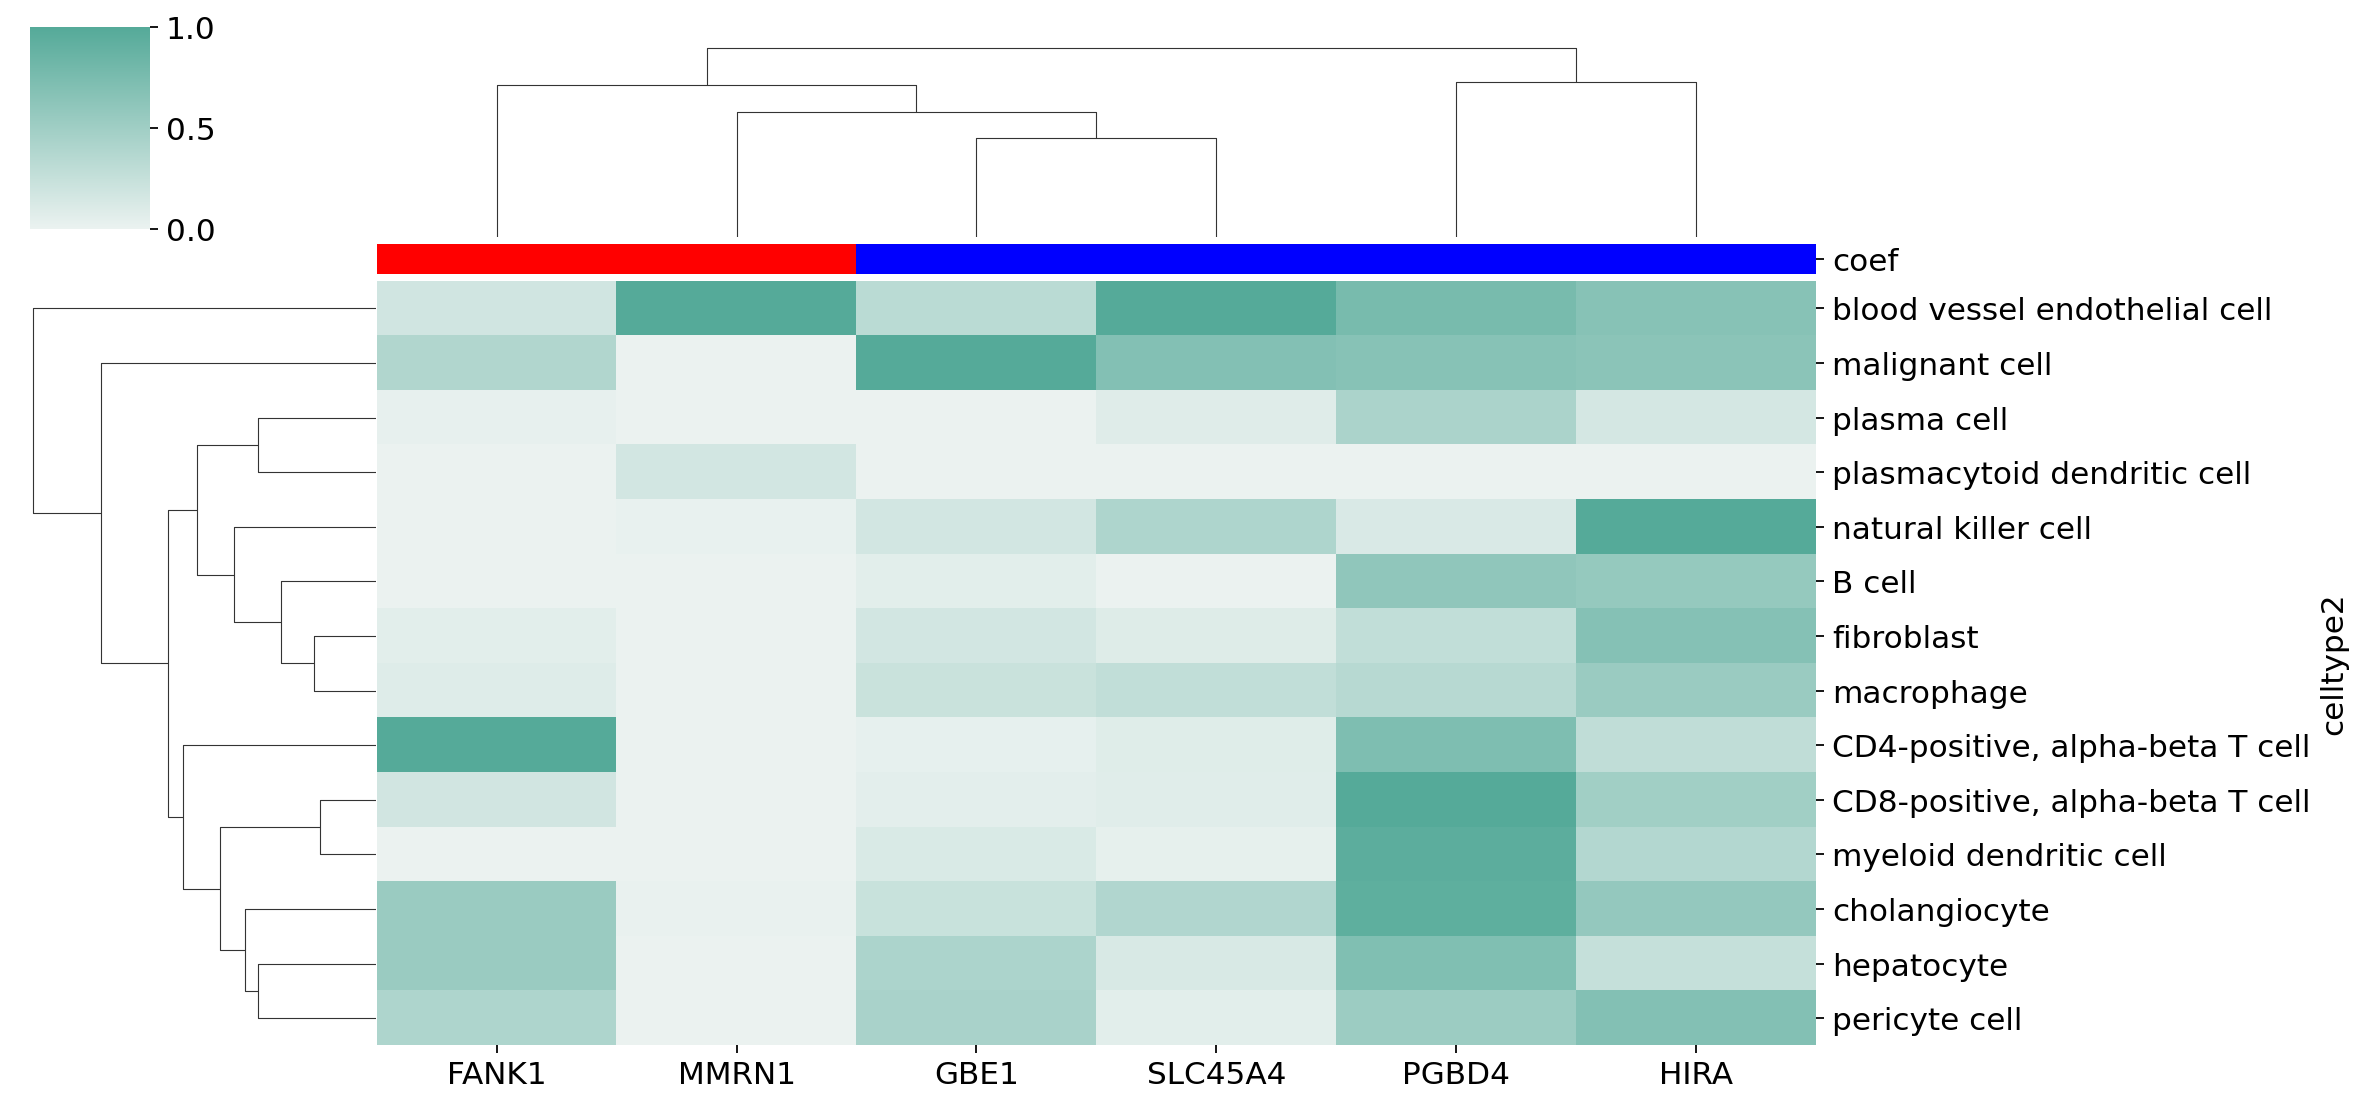

In [53]:
sns.clustermap(avgp.loc[:,excludedk], standard_scale=1,
               figsize=(15, 7),cmap=sns.color_palette("light:#5A9", as_cmap=True),
              col_colors=coefex[excluded])



In [42]:
desertk=list(set(desert).intersection(set(livcanc.raw.var_names)))


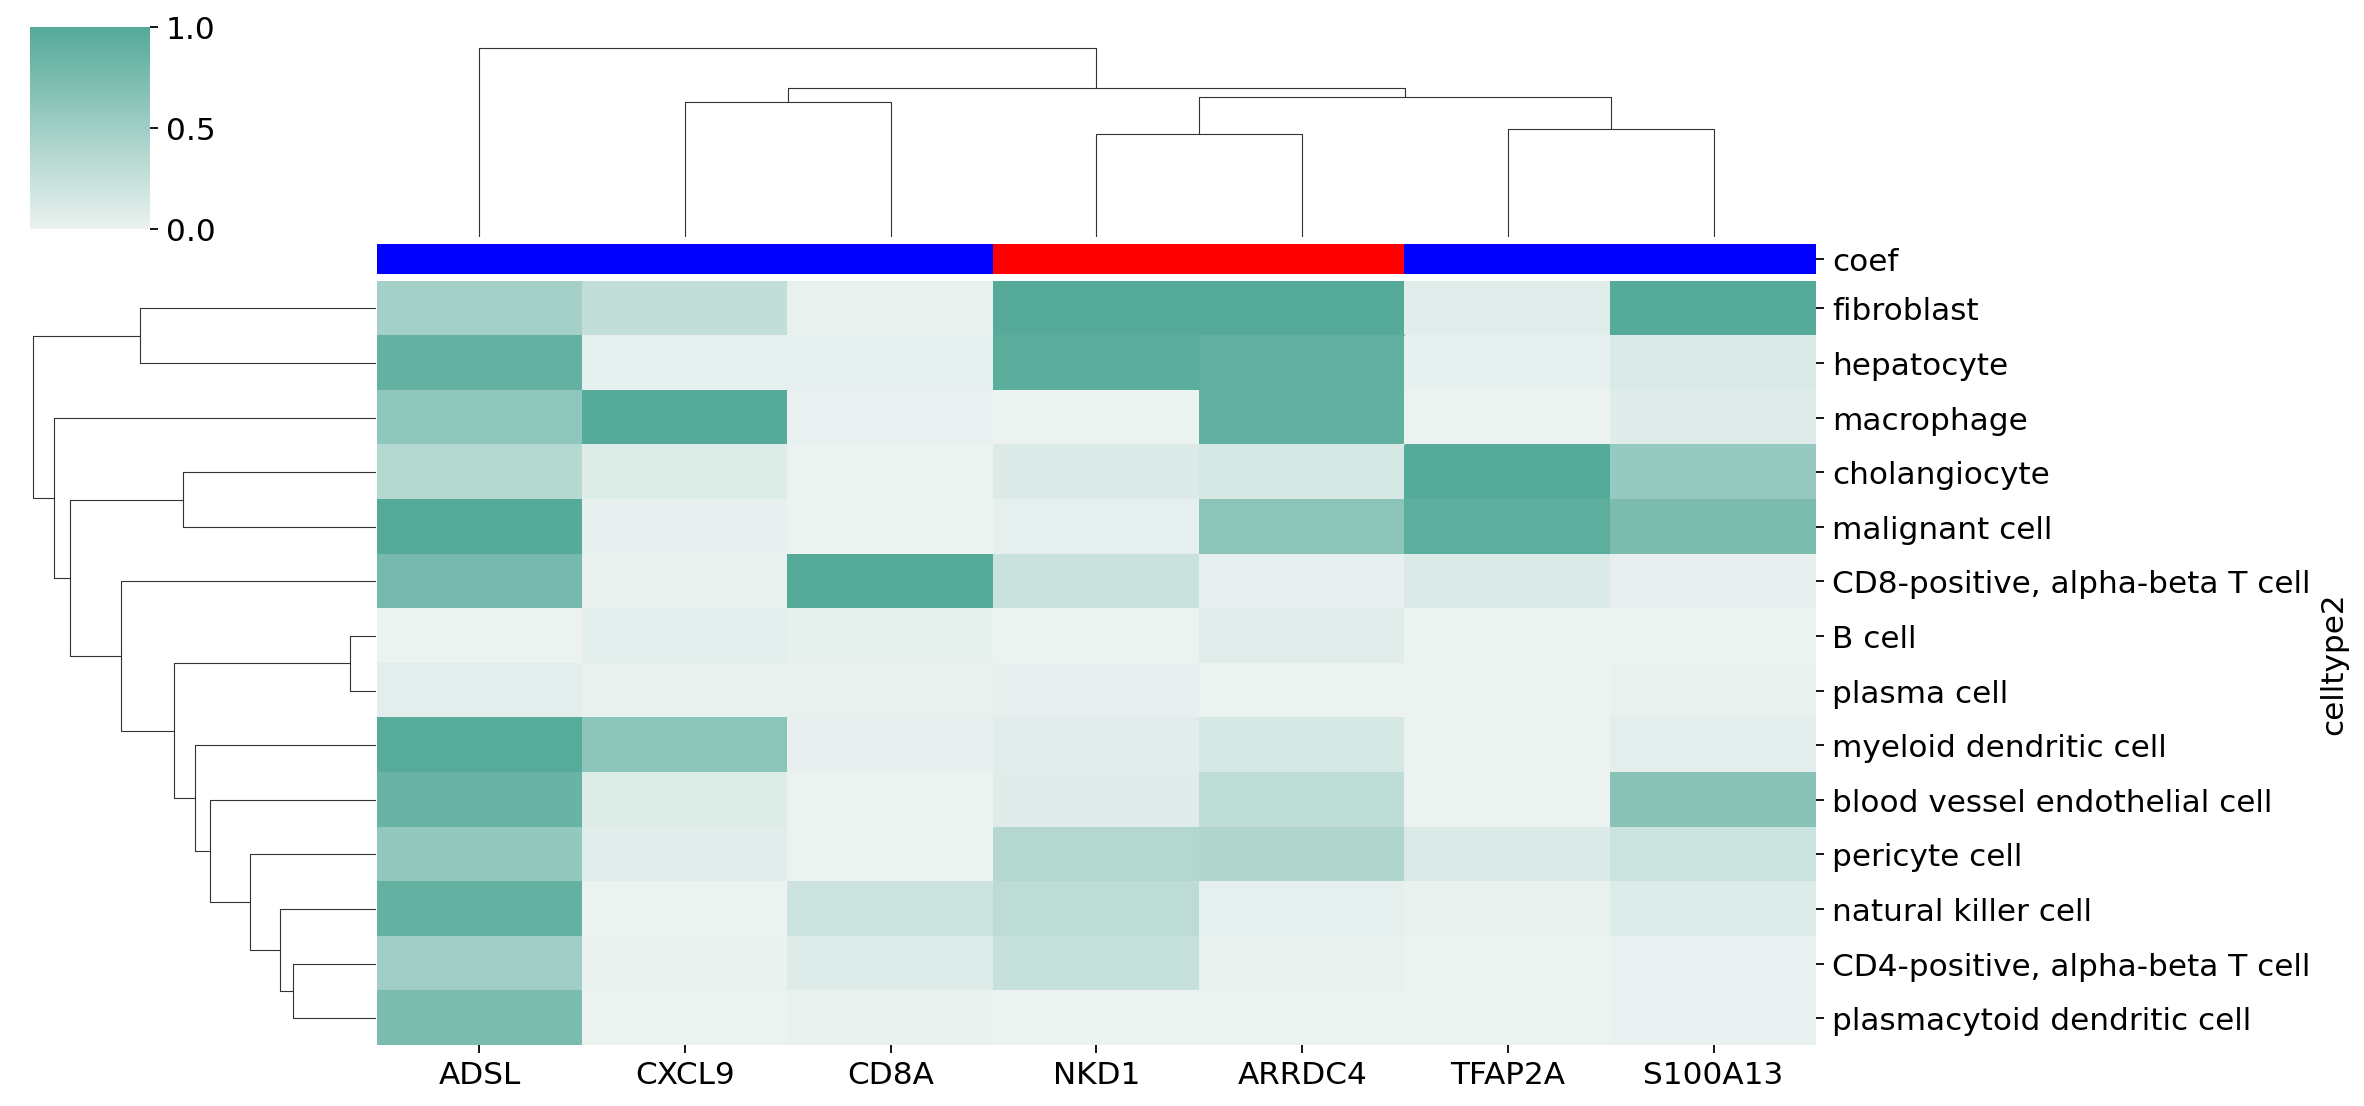

In [55]:


sns.clustermap(avgp.loc[:,desertk], standard_scale=1,col_colors=coefdes[desertk],
               figsize=(15, 7),cmap=sns.color_palette("light:#5A9", as_cmap=True))

In [ ]:
livcanc.obs['plotcelltype']=livcanc.obs['celltype3'].copy()

livcanc.obs['plotcelltype']=livcanc.obs['plotcelltype'].replace('MARCO-positive macrophage','macrophage')
livcanc.obs['plotcelltype']=livcanc.obs['plotcelltype'].replace('MSR1-positive macrophage','macrophage')
livcanc.obs['plotcelltype']=livcanc.obs['plotcelltype'].replace('CD8-positive, alpha-beta cytotoxic T cell','CD8-positive T cell')
livcanc.obs['plotcelltype']=livcanc.obs['plotcelltype'].replace('blood vessel endothelial cell','endothelial cell')
livcanc.obs['plotcelltype']=livcanc.obs['plotcelltype'].replace('IgG plasma cell','plasma cell')
livcanc.obs['plotcelltype']=livcanc.obs['plotcelltype'].replace('CD1c-positive myeloid dendritic cell','myeloid dendritic cell')
livcanc.obs['plotcelltype']=livcanc.obs['plotcelltype'].replace('memory B cell','B cell')
livcanc.obs['plotcelltype']=livcanc.obs['plotcelltype'].replace('naive B cell','B cell')
livcanc.obs['plotcelltype']=livcanc.obs['plotcelltype'].replace('MARCO-positive macrophage','macrophage')
livcanc.obs['plotcelltype']=livcanc.obs['plotcelltype'].replace('central memory CD4-positive, alpha-beta T cell','CD4-positive T cell')
livcanc.obs['plotcelltype']=livcanc.obs['plotcelltype'].replace('effector memory CD8-positive, alpha-beta T cell','CD8-positive T cell')
livcanc.obs['plotcelltype']=livcanc.obs['plotcelltype'].replace('exhausted-like CD8-positive, alpha-beta T cell','CD8-positive T cell')
livcanc.obs['plotcelltype']=livcanc.obs['plotcelltype'].replace('naive thymus-derived CD4-positive, alpha-beta T cell','CD4-positive T cell')
livcanc.obs['plotcelltype']=livcanc.obs['plotcelltype'].replace('proliferating CD8-positive, alpha-beta T cell','proliferating T cell')


sc.tl.dendrogram(livcanc, groupby='plotcelltype')

main=['NKD1','MMRN1','FANK1','LAMP5','IDO1', 'CXCL9', 'LAG3', 'CD8A', 'ITGAE', 'UBE2L6', 'PSMB8', 'PSMB9']
sc.pl.dotplot(livcanc,var_names=main, dendrogram=True, groupby='plotcelltype', dot_max=0.3,vmax=0.4, save='LiverCanc-mainfig.svg')


In [ ]:
sc.pl.dotplot(livcanc,var_names=others, dendrogram=True, groupby='plotcelltype', dot_max=0.2,vmax=0.3, save='LiverCanc-supfig.svg')

In [ ]:
sc.pl.dotplot(livcanc,var_names=kimmuno, groupby='celltype2', dot_max=0.2,vmax=0.25)

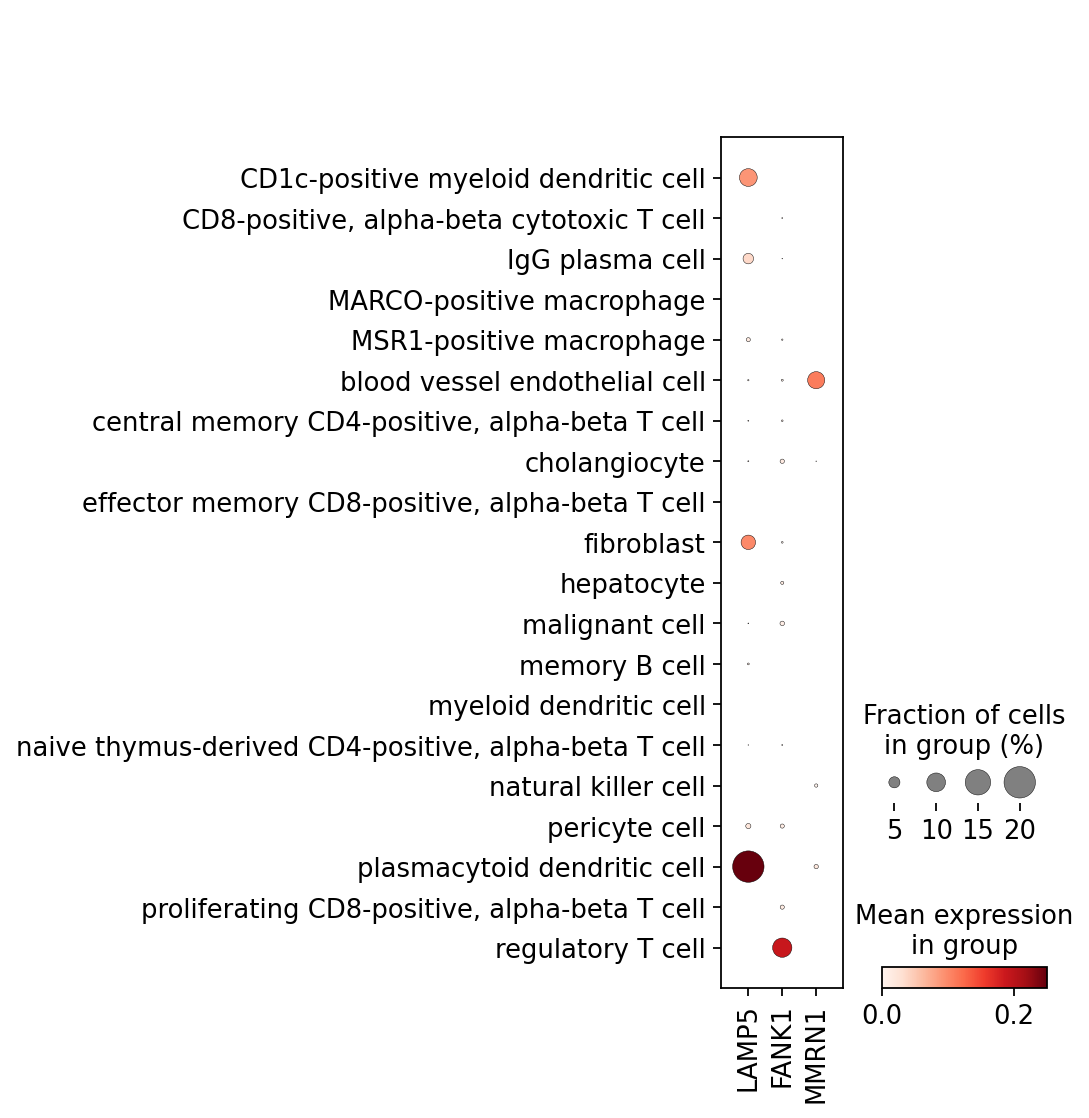

In [57]:
sc.pl.dotplot(livcanc,var_names=kexcluded, groupby='celltype3', dot_max=0.2,vmax=0.25)

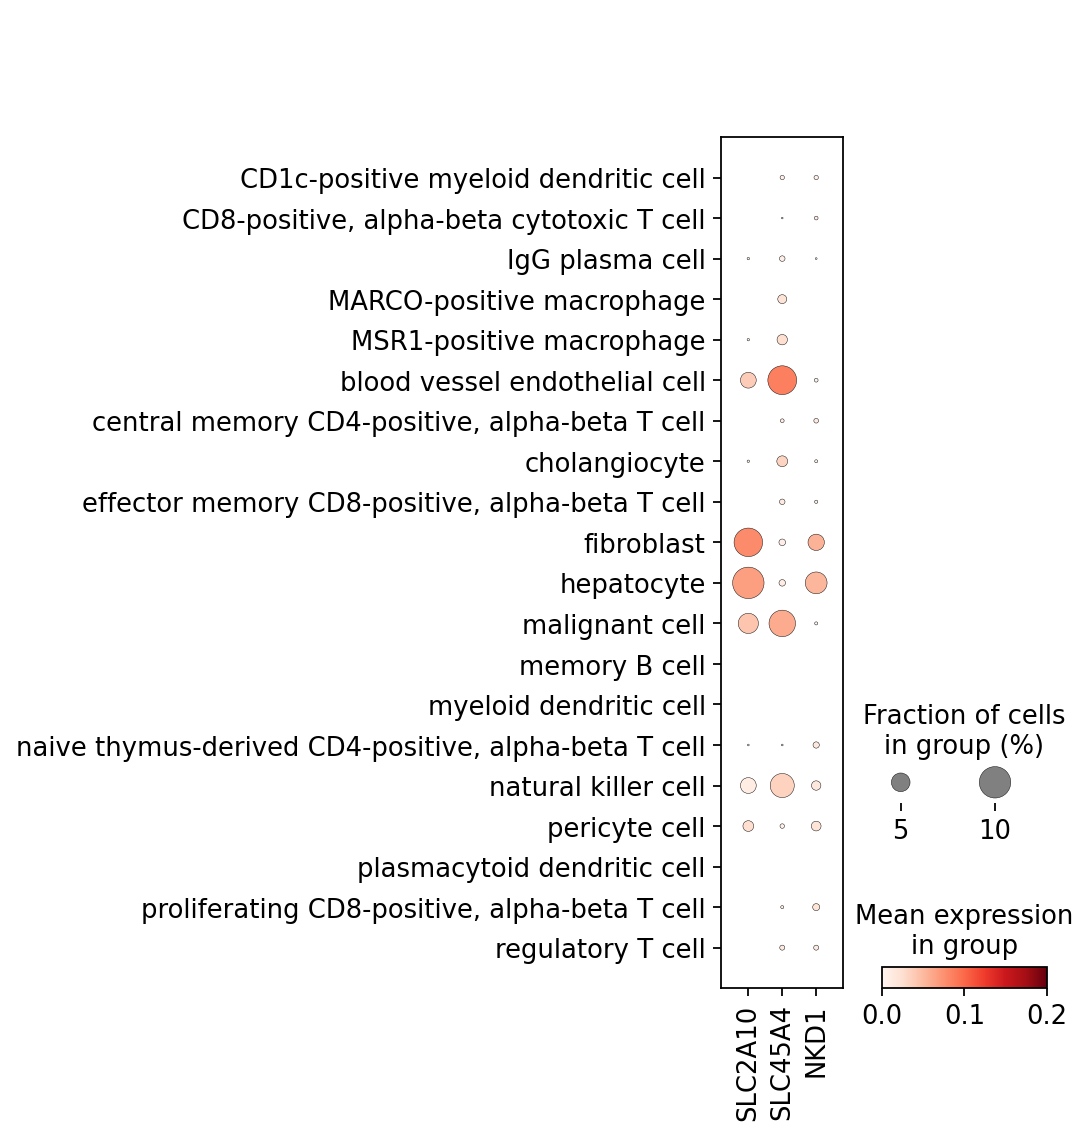

In [58]:
sc.pl.dotplot(livcanc,var_names=kdesert, groupby='celltype3', dot_max=0.1,vmax=0.2)

### Lung Cancer 

In [ ]:
lung=sc.read('lung_cancer_standard_workflow_besca2_0.annotated.h5ad')

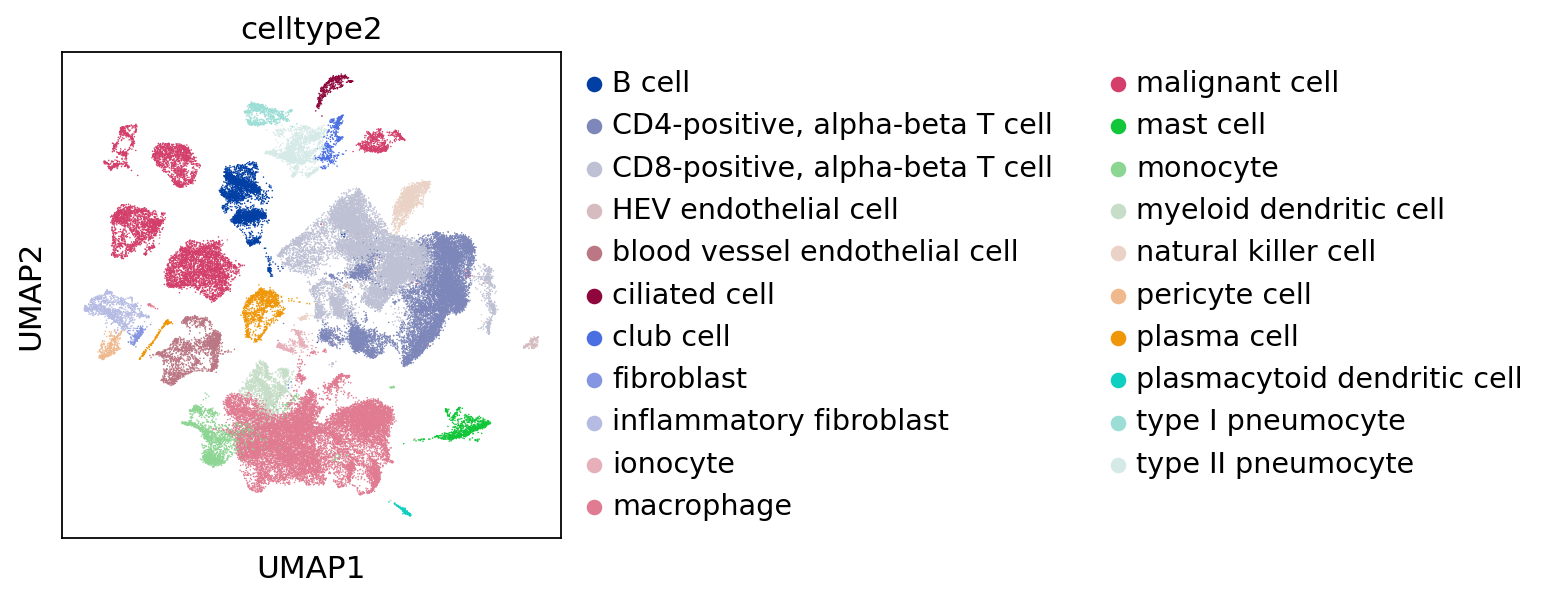

In [33]:
sc.pl.umap(lung,color='celltype2')


In [61]:
[avgp, fctp]=bc.get_means(lung, 'celltype2')


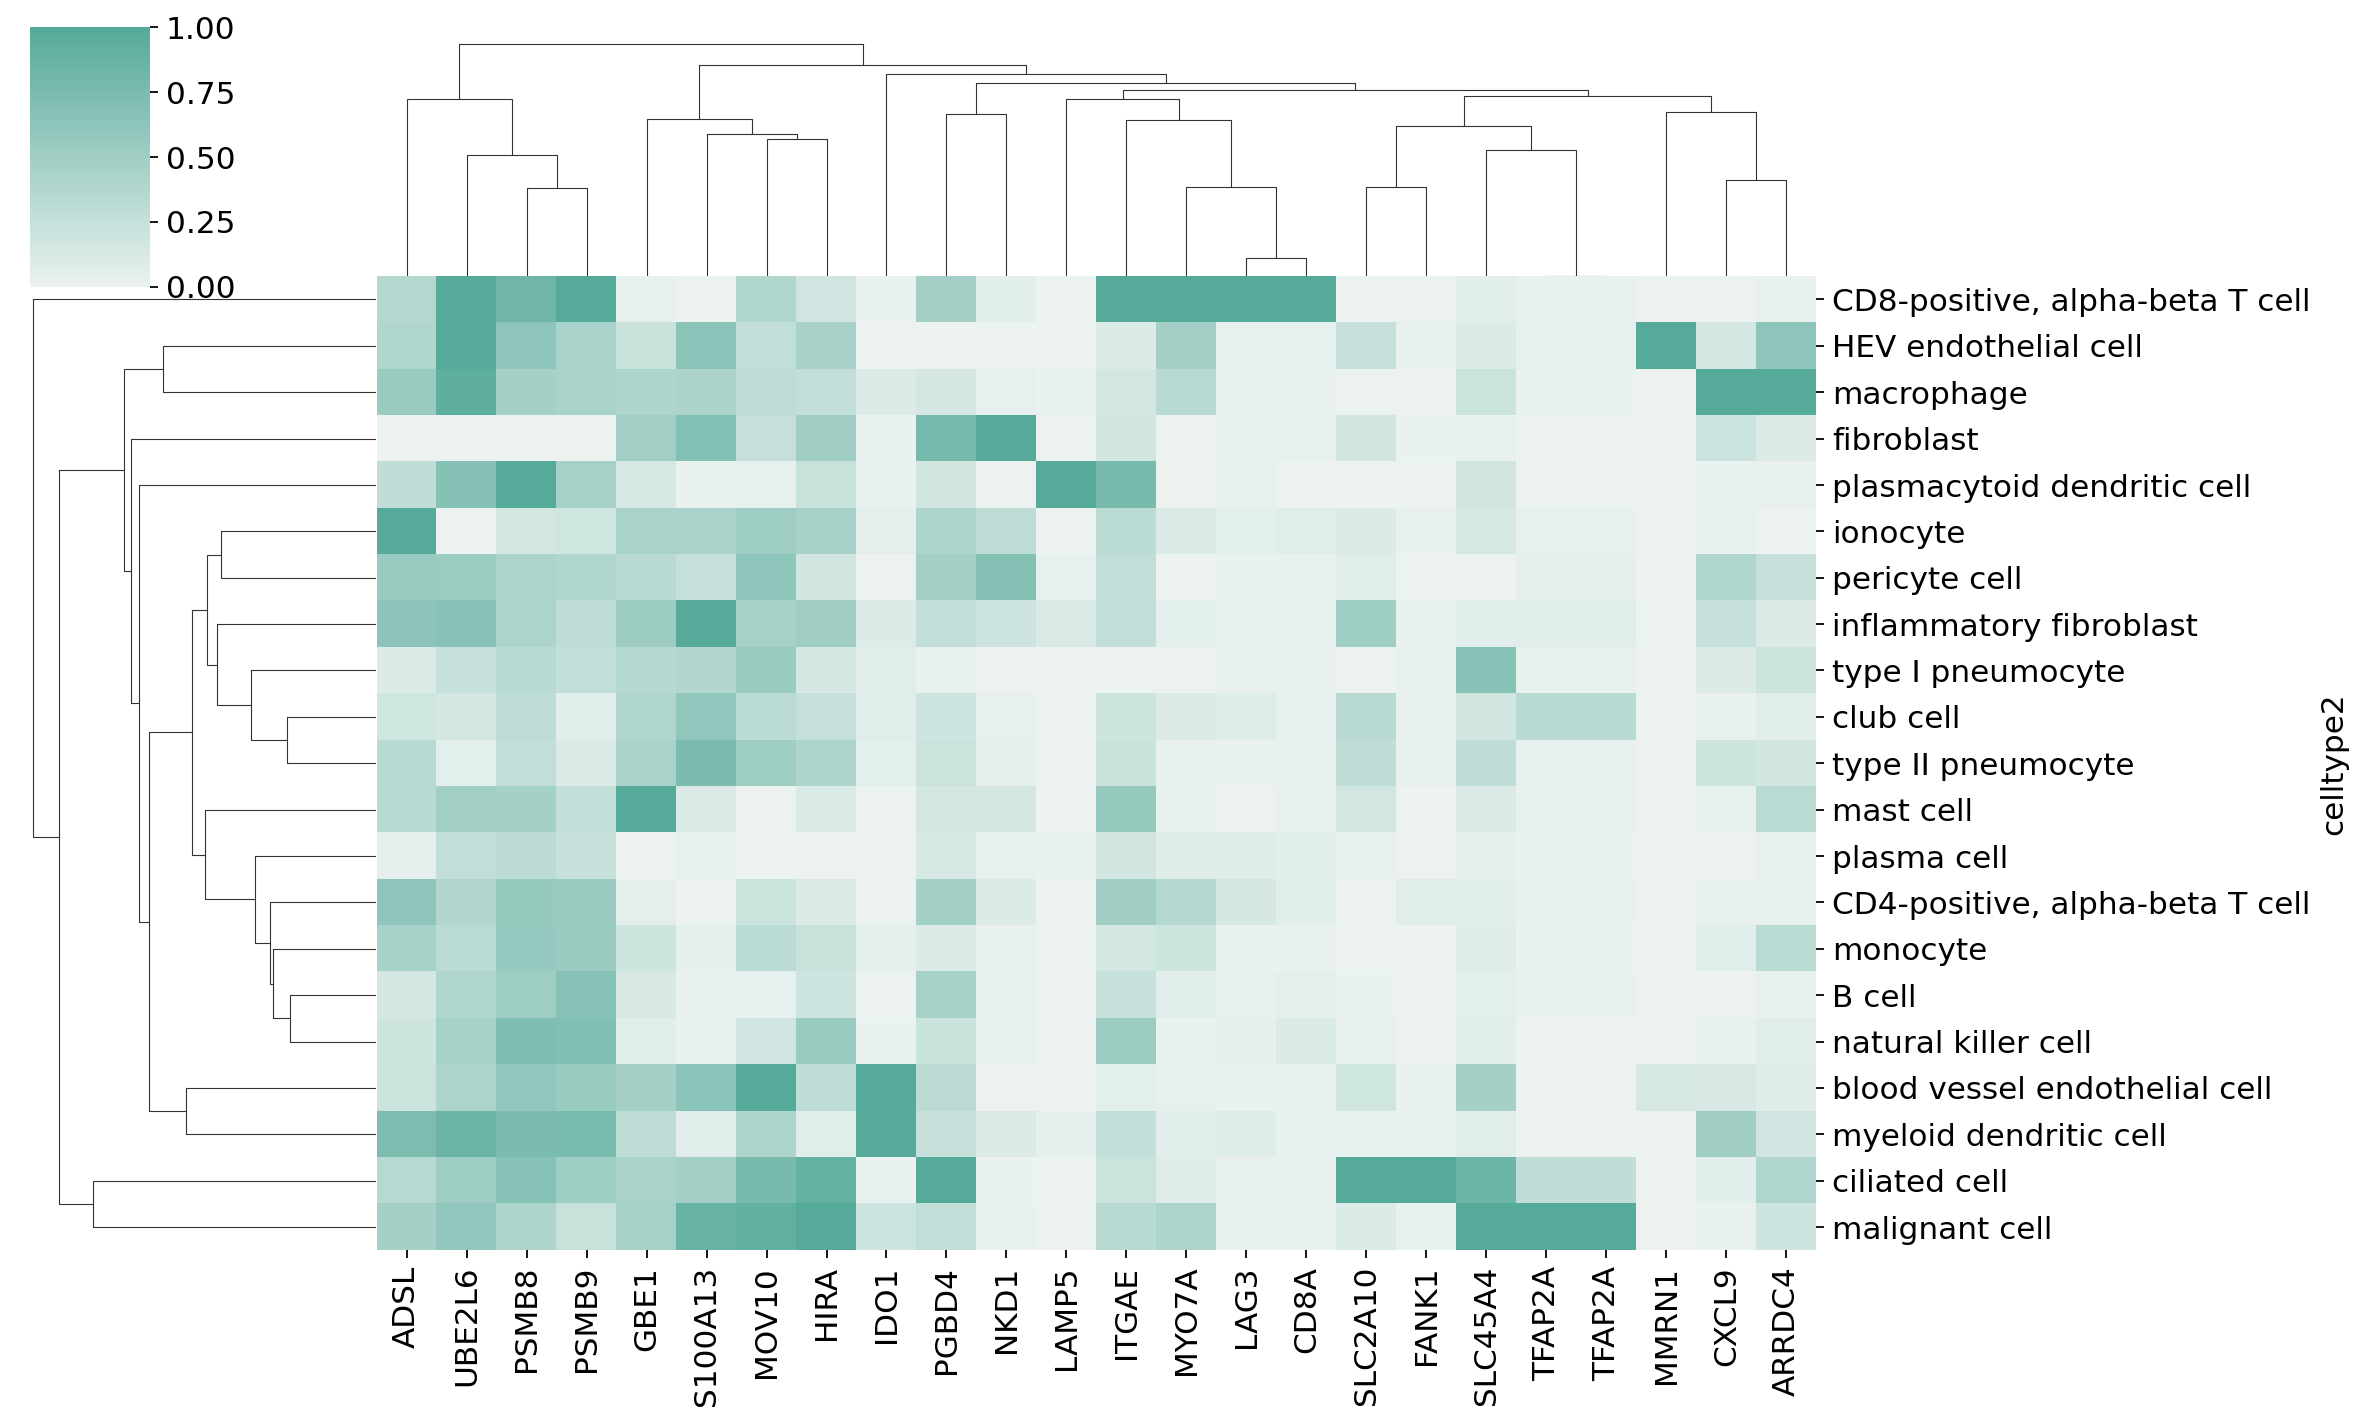

In [67]:
sns.clustermap(avgp.loc[:,inflamed+excluded+desert], standard_scale=1,
               figsize=(15, 9),cmap=sns.color_palette("light:#5A9", as_cmap=True))




In [ ]:
sc.pl.dotplot(lung,var_names=kimmuno, groupby='celltype3', dot_max=0.3,vmax=0.75)


In [ ]:
lung.obs['plotcelltype']=lung.obs['celltype3'].copy()

lung.obs['plotcelltype']=lung.obs['plotcelltype'].replace('cytotoxic CD56-dim natural killer cell','natural killer cell')
lung.obs['plotcelltype']=lung.obs['plotcelltype'].replace('CD8-positive, alpha-beta cytotoxic T cell','CD8-positive T cell')
lung.obs['plotcelltype']=lung.obs['plotcelltype'].replace('CD4-positive, alpha-beta cytotoxic T cell','CD4-positive T cell')
lung.obs['plotcelltype']=lung.obs['plotcelltype'].replace('type I pneumocyte','pneumocyte')
lung.obs['plotcelltype']=lung.obs['plotcelltype'].replace('type II pneumocyte','pneumocyte')

lung.obs['plotcelltype']=lung.obs['plotcelltype'].replace('CCR7-positive myeloid dendritic cell','myeloid dendritic cell')
lung.obs['plotcelltype']=lung.obs['plotcelltype'].replace('memory B cell','B cell')
lung.obs['plotcelltype']=lung.obs['plotcelltype'].replace('naive B cell','B cell')
lung.obs['plotcelltype']=lung.obs['plotcelltype'].replace('MSR1-positive macrophage','macrophage')
lung.obs['plotcelltype']=lung.obs['plotcelltype'].replace('central memory CD4-positive, alpha-beta T cell','CD4-positive T cell')
lung.obs['plotcelltype']=lung.obs['plotcelltype'].replace('effector memory CD8-positive, alpha-beta T cell','CD8-positive T cell')
lung.obs['plotcelltype']=lung.obs['plotcelltype'].replace('exhausted-like CD8-positive, alpha-beta T cell','CD8-positive T cell')
lung.obs['plotcelltype']=lung.obs['plotcelltype'].replace('naive thymus-derived CD4-positive, alpha-beta T cell','CD4-positive T cell')
lung.obs['plotcelltype']=lung.obs['plotcelltype'].replace('proliferating CD8-positive, alpha-beta T cell','proliferating T cell')


sc.tl.dendrogram(lung, groupby='plotcelltype')

#main=['NKD1','MMRN1','FANK1','LAMP5','IDO1', 'CXCL9', 'LAG3', 'CD8A', 'ITGAE', 'UBE2L6', 'PSMB8', 'PSMB9']
sc.pl.dotplot(lung,var_names=main, dendrogram=True, groupby='plotcelltype', dot_max=0.3,vmax=0.4, save='lung-mainfig.svg')

In [ ]:
sc.pl.dotplot(lung,var_names=others, dendrogram=True, groupby='plotcelltype', dot_max=0.2,vmax=0.3, save='Lung-supfig.svg')

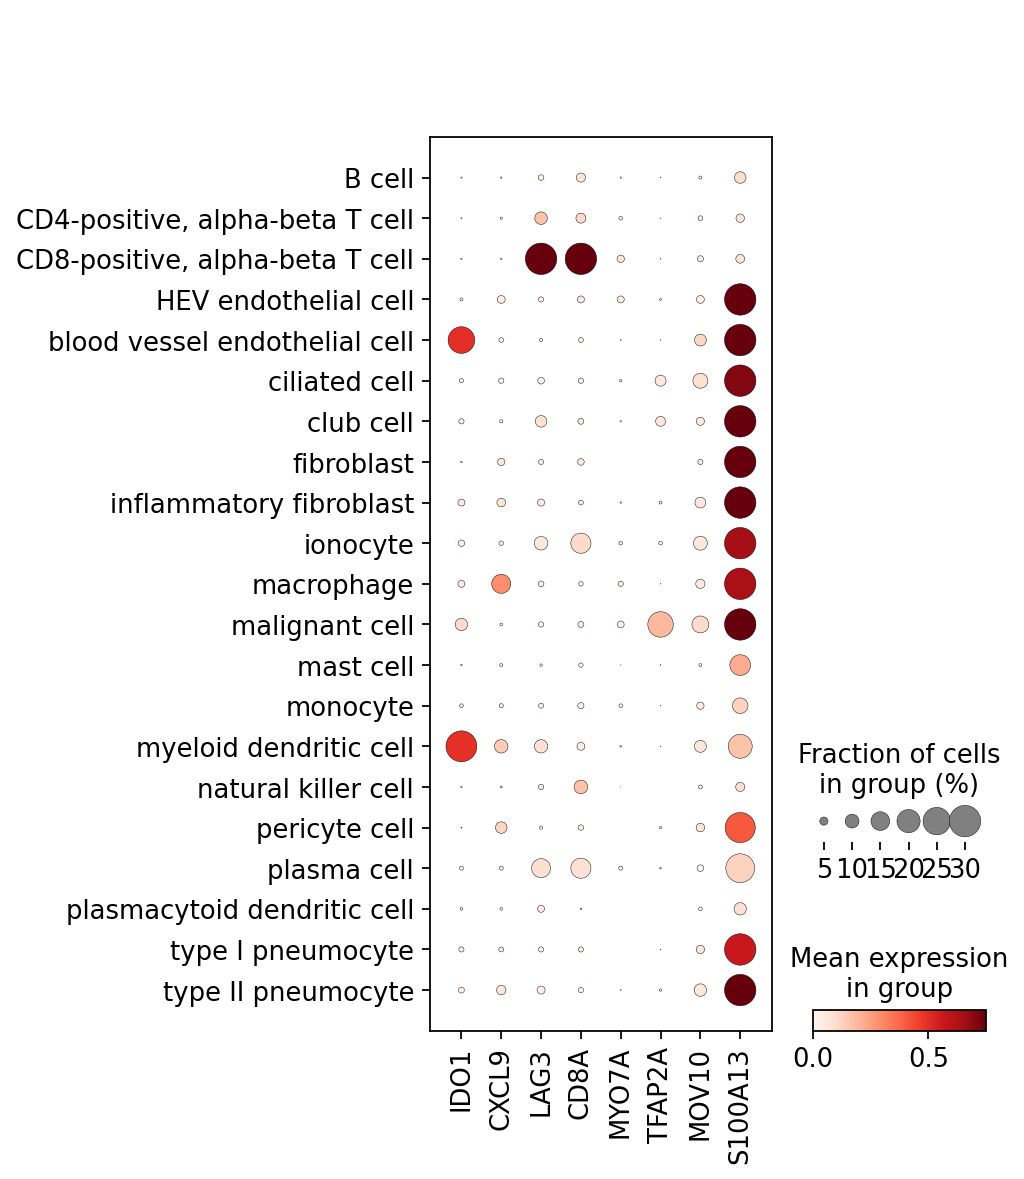

In [63]:
sc.pl.dotplot(lung,var_names=kimmuno, groupby='celltype2', dot_max=0.3,vmax=0.75)



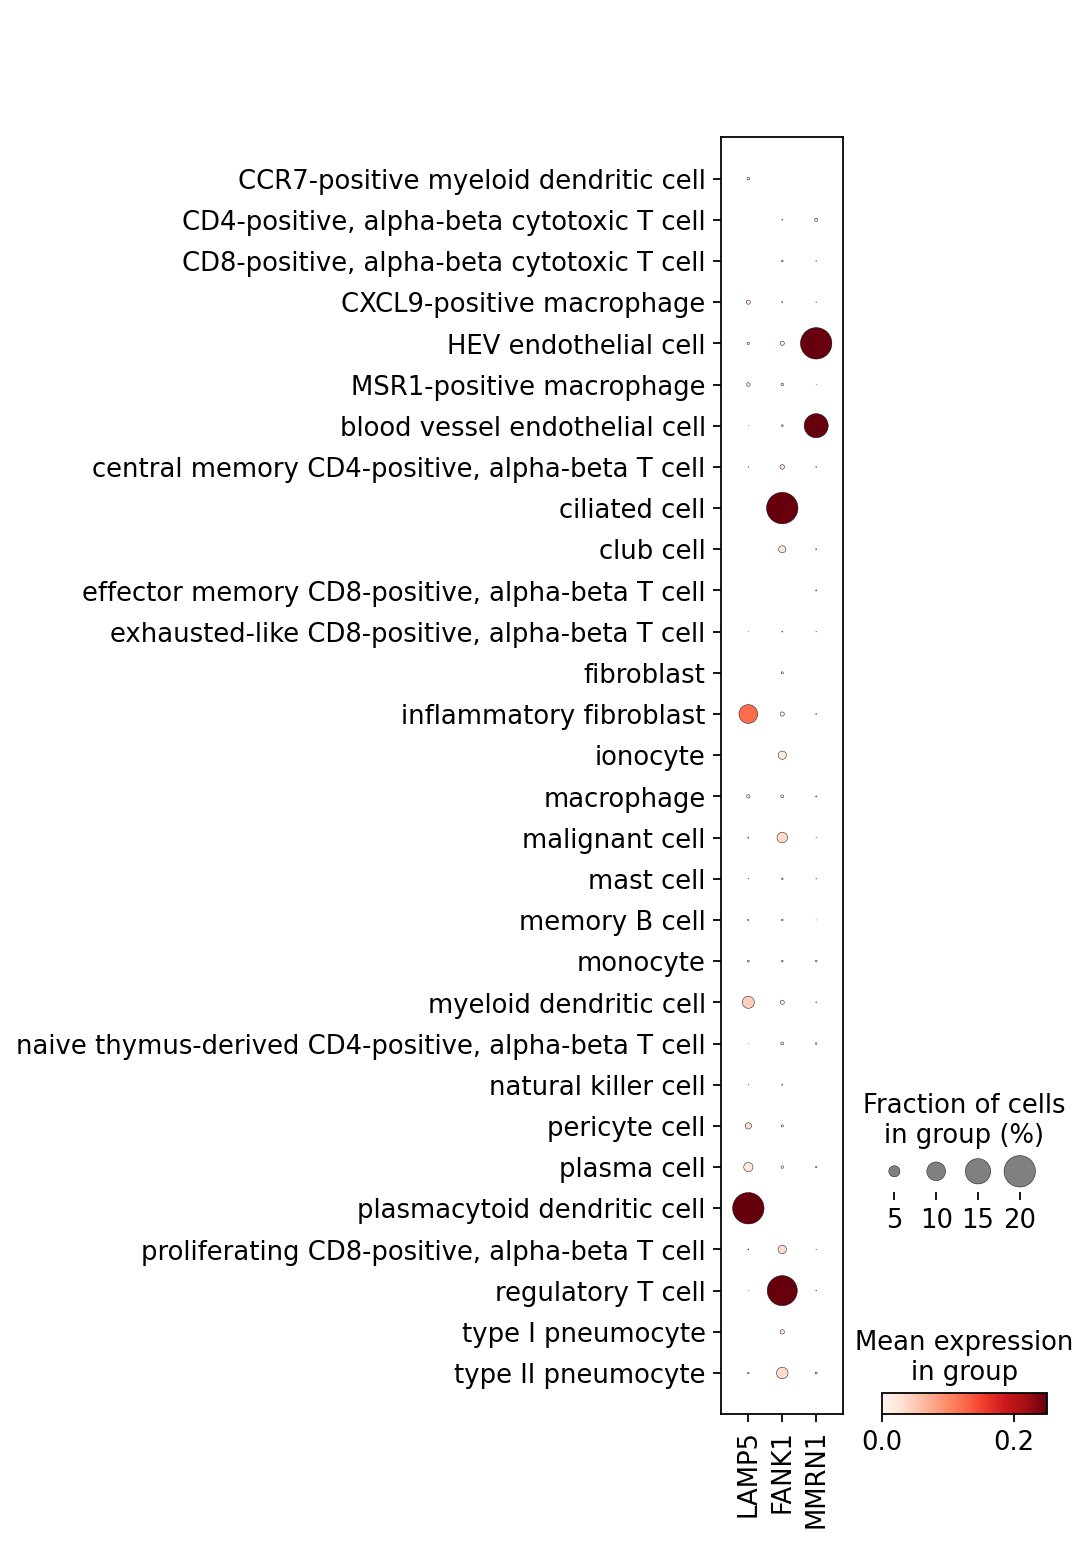

In [64]:
sc.pl.dotplot(lung,var_names=kexcluded, groupby='celltype3', dot_max=0.2,vmax=0.25)


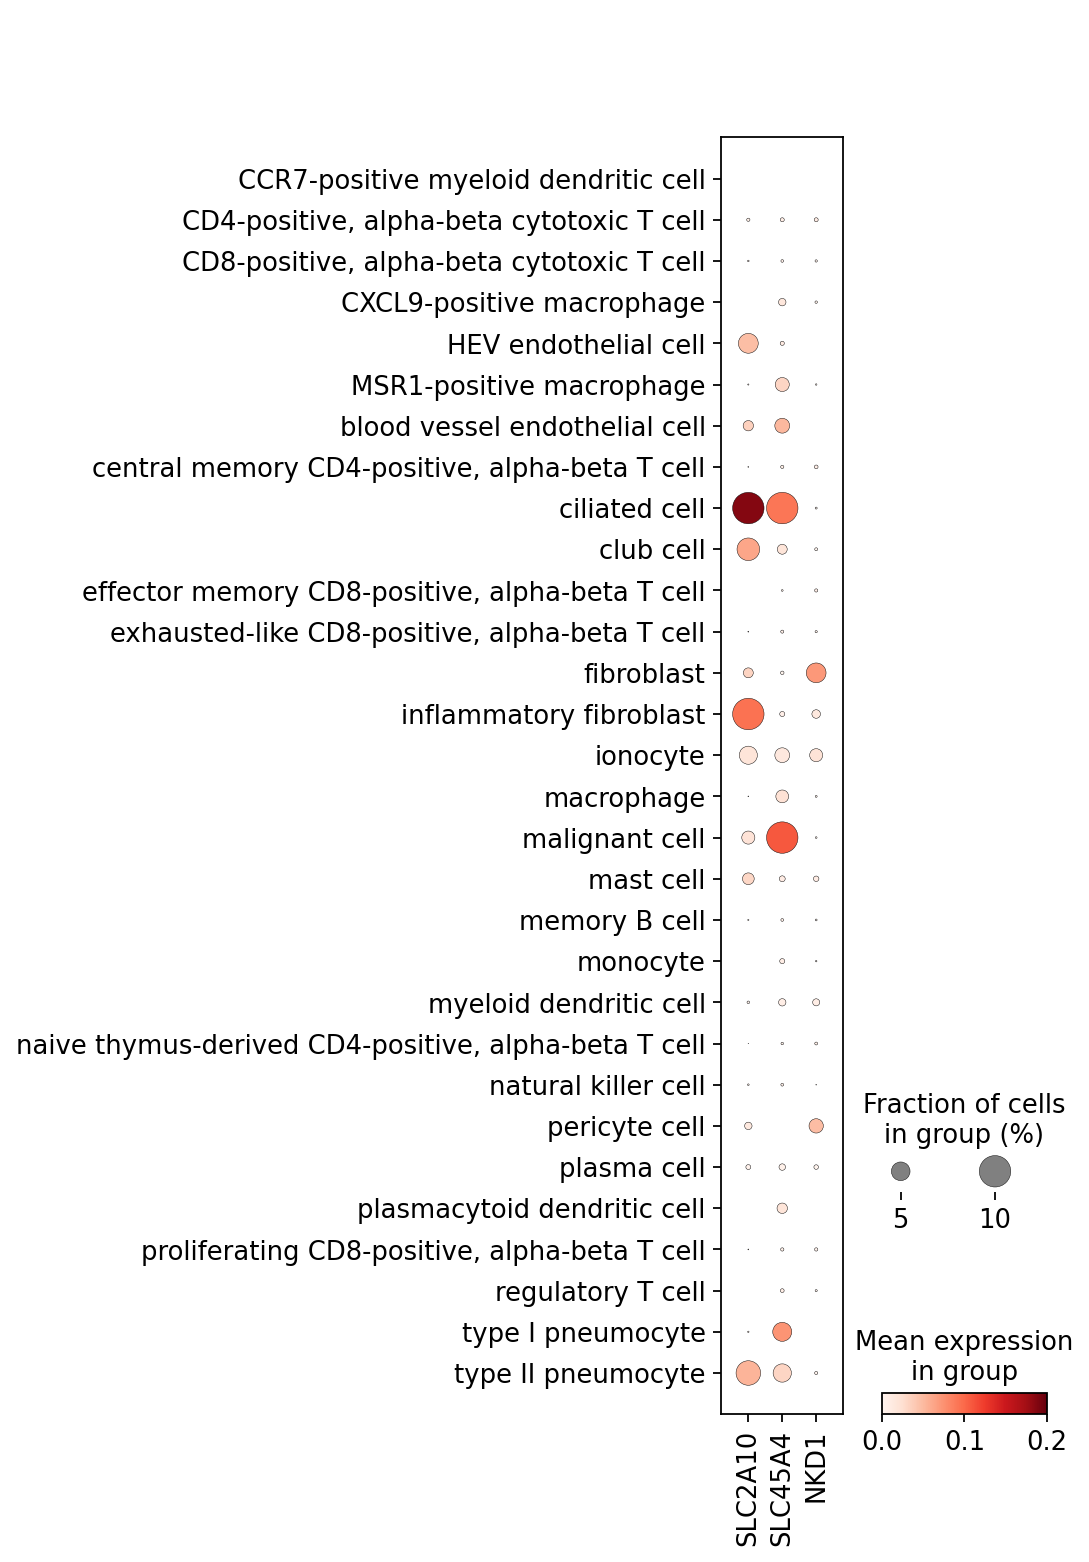

In [86]:



sc.pl.dotplot(lung,var_names=kdesert, groupby='celltype3', dot_max=0.1,vmax=0.2)

In [ ]:
! jupyter nbconvert --to html 81_selected_genes_expression.ipynb